# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print(actions)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

[[-1.          0.39205772  0.18308404 -0.18037095]
 [-0.77150394  0.06375643  0.19852883 -0.04052109]
 [ 0.63977476 -1.         -1.         -0.04378502]
 [ 0.8589905  -1.          1.         -0.1864817 ]
 [-0.43731135  1.          1.          0.25596372]
 [ 1.          0.65367174  1.         -1.        ]
 [-1.         -0.68555437  0.51479076 -0.14860329]
 [-1.          0.99652534 -0.23776188 -0.11022617]
 [ 1.          1.          0.93977543  1.        ]
 [-1.          1.         -1.         -0.30280239]
 [-1.          0.44841591 -1.         -0.59831185]
 [ 1.          0.45181884 -1.         -0.49758209]
 [-0.80215138  1.         -1.         -0.06090893]
 [-0.76592652 -1.          1.         -0.34356748]
 [ 1.         -1.         -0.3531109  -1.        ]
 [ 1.         -1.         -0.9516168   0.44286397]
 [ 0.05096605  1.          0.5693394   0.61623409]
 [ 1.         -1.         -1.          0.23300007]
 [ 0.34016382  0.69422176 -0.65365635  0.72218831]
 [ 0.3847977  -0.76217569  0.63

[[-0.92099795 -0.83612197  0.88750056  0.92657251]
 [ 1.         -0.13506321  0.42672326  0.52503156]
 [ 0.1102526   1.         -0.36248655  1.        ]
 [-1.         -0.60219568  1.          0.20671231]
 [ 0.22423367  1.          0.88293148 -1.        ]
 [ 1.          0.28465195  1.          1.        ]
 [-1.         -0.76913794  1.          0.70093705]
 [-0.46557027 -0.47407334  1.          0.57229117]
 [-0.30548071  0.43670704  0.08005262  1.        ]
 [-0.25932856  0.88987795 -0.14654189 -1.        ]
 [-0.92874925  1.          0.44287088  0.24199688]
 [ 0.65392211  0.76340138  1.          1.        ]
 [-0.6311249   0.68228198 -0.93447318 -1.        ]
 [ 0.69346889 -0.31981423 -0.6831351  -0.57753621]
 [-1.          1.          0.59981926 -0.03486099]
 [-0.47665066 -1.          0.37016174  1.        ]
 [-1.          1.          1.          0.80361252]
 [ 0.28146646  0.07698129  0.14473595  0.17772009]
 [ 0.65403203  0.45160719 -0.43386001  0.80949313]
 [-0.0577685   1.         -0.02

[[-0.25180761 -1.         -0.19656101 -0.20795356]
 [ 0.50831453 -1.          0.40692134  0.19412163]
 [ 1.          0.892045    0.6518729  -0.90109776]
 [ 0.28059557 -0.10749601 -0.55583806  0.04835768]
 [ 0.86245071 -0.31857854 -0.04115815 -0.32195953]
 [ 0.13525337  0.33383792 -0.21759137  0.37540961]
 [ 1.          0.09350496  0.20542085  0.30276758]
 [-1.         -0.5412299  -1.         -0.2912069 ]
 [ 0.75896425 -0.07332302  0.10412954  1.        ]
 [ 0.01971473  0.9710311   0.37338264 -0.10495259]
 [ 0.6001643   1.         -0.63740438  0.80453554]
 [-0.6843092   0.77998057  0.29149362 -0.24347145]
 [-0.0962392   0.44316176 -0.76444299 -0.77357075]
 [-0.7674355  -0.84618254  0.26956131 -0.63521196]
 [ 0.28774157  0.29653122 -0.92889736 -0.40694557]
 [-1.         -0.26961489 -1.         -0.42140259]
 [-0.9246857   0.53880139 -0.28576787  0.60267515]
 [ 1.          0.56509939 -1.         -0.67468746]
 [ 0.62235544  0.98350884 -1.          0.51951679]
 [-0.60109259 -1.         -1.  

[[ 1.00000000e+00 -7.10269433e-02  1.00000000e+00 -5.87130269e-01]
 [ 7.29744711e-01 -1.00000000e+00 -1.00000000e+00  6.61021831e-01]
 [-9.24532606e-01 -1.15766456e-01  2.20844121e-01  3.62988133e-01]
 [ 7.45764107e-01 -1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  1.59678873e-01 -5.14049676e-01  1.00000000e+00]
 [-1.00000000e+00  3.67877097e-01  1.72698620e-01 -4.89462414e-01]
 [ 2.09827416e-01  6.60930831e-01 -1.00000000e+00 -1.37094263e-01]
 [ 7.97157399e-02 -1.27405598e-04 -7.10545386e-01  6.47235735e-01]
 [-4.69781839e-01 -6.14701829e-01  4.96115506e-01  6.38720979e-01]
 [-4.32004669e-02  7.41297722e-01 -2.59298205e-03  1.88941044e-01]
 [ 7.60640479e-01  6.13009296e-01 -2.38724442e-01 -9.87889125e-01]
 [-1.19342776e-01 -1.00000000e+00  3.96718243e-01  3.42931196e-01]
 [-1.20299952e-02  1.00000000e+00 -1.00000000e+00  7.88066057e-01]
 [ 2.56847409e-01 -1.00000000e+00 -4.96470343e-02 -1.00000000e+00]
 [-4.42875795e-01  1.00000000e+00  4.19586698e-01  7.65951097e

[[ 0.06492561  0.74580566 -0.39391384 -0.79413584]
 [ 1.          1.          0.26753801 -0.09646474]
 [ 0.30592502  0.2959569  -1.          1.        ]
 [ 0.45101939  0.52624044 -0.04100058 -0.05983742]
 [-0.86193254  0.4498052   1.          1.        ]
 [-1.          0.09036189 -0.736358    0.05066597]
 [-0.70669232  0.99994663  1.         -0.47642192]
 [-1.          1.         -0.55331425  0.12011008]
 [-1.          0.65517329  0.93032288  0.05476895]
 [ 0.45292553  0.36697903 -0.56296039 -0.04523786]
 [-0.24923255 -0.59982364 -1.          0.57736607]
 [-0.09486276 -0.93709369 -0.68427558  1.        ]
 [ 1.          0.34218999 -0.94951535 -0.40094196]
 [-1.         -1.         -0.59972341 -0.47928456]
 [ 1.          1.         -0.98544771 -0.07634229]
 [-0.58702524  0.24579137 -0.70993671 -0.89868254]
 [-0.61942652 -0.14417275 -0.16015175  0.92282514]
 [-0.02373467  0.05737009  0.79269816  1.        ]
 [ 0.21338999  1.          0.0614153  -0.74304449]
 [ 1.         -0.22631524 -0.18

[[ 0.11028386  1.         -0.22537182  1.        ]
 [ 0.91239097 -0.22377002  0.52654905 -0.18715753]
 [-0.30208136 -0.85526958  0.13348241 -1.        ]
 [ 0.463468   -0.39467574 -0.77978127 -0.11596975]
 [-0.15544986 -0.47085305 -0.77620468 -1.        ]
 [ 0.16184937  0.77975122  0.36965653  1.        ]
 [-0.17930763 -0.8497511   1.          1.        ]
 [-1.          0.20213285  0.86496121  0.57602408]
 [-1.         -1.          0.89146587 -0.76907508]
 [-0.39438386 -0.9028487  -1.          0.7981126 ]
 [ 0.84676594 -0.48673557 -0.08401523 -0.10444374]
 [ 0.86628989  0.04829382 -0.42965782  0.3721045 ]
 [-0.93336249  0.15071495  0.252319   -0.26748416]
 [ 0.29635292 -0.1043288   0.72029219  0.71014073]
 [ 0.77461841  0.0429245   1.          0.08047478]
 [-0.18533178  0.03536209  1.          1.        ]
 [-0.82120535  0.2805916  -0.20805209  1.        ]
 [-1.          1.         -0.96868279 -0.03348862]
 [-1.          0.73324586  0.19282938 -1.        ]
 [-1.         -1.         -0.46

[[-1.00000000e+00 -3.27108385e-01 -1.00000000e+00  1.00000000e+00]
 [-7.91846140e-01 -1.00000000e+00 -1.00000000e+00  2.74789459e-01]
 [-1.00000000e+00  9.88733706e-01 -9.20754661e-01  3.22958900e-03]
 [ 5.25337588e-01 -7.68195472e-01  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -7.16009232e-01  1.00000000e+00 -2.13108405e-01]
 [-3.90295902e-01 -1.00000000e+00 -1.00000000e+00  6.19794552e-02]
 [ 1.23764629e-01  5.56060747e-01  1.00000000e+00 -8.19332582e-01]
 [-1.00000000e+00 -1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.88247790e-01  1.00000000e+00  1.00000000e+00]
 [ 9.26249151e-01  7.37291049e-01  1.00000000e+00  1.00000000e+00]
 [ 2.35180819e-01  9.00401129e-01 -1.56456634e-01 -7.56964656e-01]
 [ 2.76058817e-01  1.00000000e+00  1.26198190e-01  4.83858664e-01]
 [ 1.35500576e-04 -1.00000000e+00 -3.34071051e-01 -4.15357848e-01]
 [-6.47147067e-01  1.00000000e+00 -9.02820202e-01  8.15278271e-01]
 [-1.00000000e+00  1.00000000e+00  1.00000000e+00 -1.00000000e

 [ 0.19912907 -0.61179704  0.32261796 -1.        ]]
[[-0.60610409  0.13646356 -0.93306717 -1.        ]
 [ 1.         -0.75288786 -0.12272796  0.15154923]
 [-1.          0.33469602 -0.39569788 -0.60825054]
 [-0.14027368 -0.78606324  0.43539726 -0.63059201]
 [-1.         -0.12800506  1.          0.85754185]
 [ 0.52135401 -0.27039318  1.         -1.        ]
 [ 0.77011875  1.         -0.26368208  0.31563917]
 [ 0.35879019  1.          0.53028628  1.        ]
 [-0.20259234 -1.          0.25206374 -0.53399042]
 [-0.16564302  1.          0.88577666  1.        ]
 [ 0.3429869   1.         -0.20177082  0.03918449]
 [ 0.07166607  0.96655691  1.          0.30647914]
 [-1.          1.         -0.63807333 -0.53152431]
 [ 1.          0.54129306 -0.5278027   0.53793297]
 [-0.81642906 -0.85283096  0.40761526  0.15160021]
 [ 0.31022825 -0.0500067   0.79929917 -0.90423397]
 [ 0.11101766  0.12049828  0.90114908  0.97883992]
 [ 0.37211831 -0.59000248  0.48643891 -0.69847635]
 [ 0.37016271 -0.52947338 -0.1

[[-1.          1.          0.26233554 -0.72433636]
 [-0.72094283 -1.         -0.69992116 -0.40597191]
 [-1.         -0.26555558  0.48194946 -0.01653361]
 [ 0.6964149  -0.23330387 -0.51945566 -0.67354981]
 [ 1.          0.33504579 -0.82354309 -0.77357388]
 [ 1.         -0.57954661  0.97362781  0.29516417]
 [-1.         -0.23668701 -1.         -0.3725243 ]
 [ 1.          1.          0.87466225 -1.        ]
 [ 1.          0.1599358   1.         -1.        ]
 [-0.69399204 -0.88471843  1.          0.81856076]
 [-1.          1.         -0.81506324  1.        ]
 [ 0.8211393   0.15018641  0.15994687 -0.40552021]
 [-0.01499016  1.         -1.         -0.65562565]
 [-0.46493753 -1.         -1.         -1.        ]
 [ 0.04317359  0.04547434 -0.54488042  0.5577557 ]
 [ 0.01991367  0.0065668  -1.         -0.35575207]
 [-0.59791076 -0.81674922  1.          0.41391738]
 [ 0.58087751  0.25894308 -0.48193834 -0.45251193]
 [ 0.97313199  0.19987223  1.          0.86042967]
 [ 0.87917549 -0.04779197 -0.58

[[ 0.39758653 -0.63799071 -1.         -0.52166269]
 [ 0.27524411  0.88088626  0.93218465 -0.10035059]
 [ 0.34718526  0.03390237  0.08884382 -0.92117649]
 [ 1.         -1.          0.10949681  0.29992876]
 [ 1.         -0.20837695  0.01730447 -0.98614616]
 [ 0.79278691 -1.         -0.37974882 -1.        ]
 [ 0.87171917 -0.67169861 -1.          0.24292213]
 [ 0.06092282 -1.         -0.25176387  0.67983357]
 [-0.3375943   1.          0.05179723  0.39802017]
 [ 0.15569798  1.          0.95888605  0.46767284]
 [-0.65466176 -0.50568546 -0.08542103 -0.03802398]
 [ 0.11944364 -0.73821663 -0.0308803  -0.29751159]
 [-0.26242745 -0.35816142  1.          0.40640532]
 [-0.52936344 -0.81351681  0.49635384 -1.        ]
 [-0.89568255 -0.16309204 -0.3955999   1.        ]
 [ 1.         -1.         -0.72473845  0.5412273 ]
 [-0.99734435  0.44466977  1.         -0.2889037 ]
 [ 1.          0.23549877 -0.03642222  0.66912887]
 [-0.81330755  0.9822188  -0.36606886 -1.        ]
 [ 0.2449229  -0.22153122  0.09

[[ 0.98579709  1.          0.3446606   0.40994045]
 [-1.         -0.05527074 -0.85136768 -0.81407657]
 [-0.87779125 -0.32351556 -0.12078901 -0.05678084]
 [ 0.34644087  1.         -0.11149241 -1.        ]
 [ 0.5115297  -0.11685445  0.61490692  0.99459773]
 [-0.11559775 -0.07035812 -1.         -0.22083743]
 [-1.          1.          0.85296914  0.68225701]
 [-0.19942809 -0.88957766 -0.06127874 -0.39511466]
 [ 0.80922977  0.94779037  1.         -0.72177714]
 [ 1.         -0.17594234 -0.86994746  0.2029062 ]
 [-0.42653089  1.          0.79019241 -0.02852492]
 [ 0.19798607 -0.38880354  0.05380955  1.        ]
 [-0.36345652 -0.61373365  0.94346248 -0.47366566]
 [-1.         -0.50380746  0.34411551  0.60367041]
 [-0.12720427  0.9506579  -1.         -0.98856432]
 [-0.85419638  1.         -0.0134679   0.30656534]
 [-0.46640097  0.64289951 -1.          0.30280987]
 [-0.08354799  0.09786569 -1.         -0.99541317]
 [ 0.13949753 -1.         -1.          1.        ]
 [ 1.         -0.397322   -1.  

[[ 0.29395824 -1.         -0.95488938 -1.        ]
 [-0.4851328   0.00597489  0.11594756 -1.        ]
 [-0.50538457  1.          0.95352249 -0.49521106]
 [-1.         -0.30174069 -1.          0.16162891]
 [ 0.00915102  0.27510206 -0.41202234  1.        ]
 [ 0.10529502  1.         -0.30806742  0.27669241]
 [-0.38445572 -0.36847082  0.0142563   0.22310797]
 [ 1.         -1.         -0.25848143 -0.04180663]
 [-0.49287638 -0.74332497 -0.91658345 -0.21650705]
 [-0.76455613 -0.52858445  0.03272063 -1.        ]
 [-1.          0.20158901 -0.47213199  1.        ]
 [-0.01857964 -0.6180172   1.         -1.        ]
 [-1.          0.43243782  0.81009882 -0.78532942]
 [-0.93487185 -1.         -0.21626857  0.00637595]
 [-0.85820154  0.96248318 -1.          1.        ]
 [-0.4201234  -0.3171786   0.58151574 -0.79519979]
 [-0.40762349  0.96313794  1.         -1.        ]
 [ 1.          0.44132743 -1.          0.34414886]
 [ 0.50235961  0.32877643  0.15778454  0.19858808]
 [-0.6237097   0.94544875  0.10

[[-0.4385584   0.24297578  1.         -0.04032868]
 [ 1.          0.94411012  1.          1.        ]
 [-0.26025386  0.80695779  0.61043806  0.23300298]
 [-1.          0.01484063 -0.00170687 -0.94979704]
 [-0.89791734  0.83683396 -0.2617625   0.57569792]
 [-0.23750184 -1.          0.03262828 -1.        ]
 [-0.64407179 -0.48324344 -1.          0.60462614]
 [ 0.08666437  0.03455224  0.54554606 -1.        ]
 [-0.8762521  -0.02188629 -1.         -1.        ]
 [ 0.03615934  0.15471696 -0.30293425  1.        ]
 [ 0.65119147  0.44370821 -1.          0.00531034]
 [-1.          0.90660203  0.41044667  1.        ]
 [-0.17158128  1.          1.         -0.53531444]
 [ 0.90386695  0.75736859 -0.38453663  0.84421286]
 [ 1.         -0.44649832  0.17777296 -0.40800515]
 [-0.08745087 -0.12841051 -0.73580235 -1.        ]
 [-1.          0.05696558  0.84706853 -0.40469384]
 [-0.87476109  0.33741288  0.63545262 -1.        ]
 [-0.02387451 -1.         -0.32340823  0.06442121]
 [ 0.65034635 -0.36612121 -0.86

[[ 0.269335   -0.55365244 -1.         -0.41766562]
 [ 1.         -0.10729632 -0.0730671   0.06297538]
 [-0.41444752 -1.         -1.         -0.47619073]
 [-1.          1.          0.60395114  0.84892567]
 [-0.01768904  0.47799045 -0.80186583  0.0500697 ]
 [ 1.         -0.20577564  0.73892489  0.52783965]
 [-1.         -0.50630003 -1.          0.98428313]
 [-1.         -0.39442875 -0.44687575 -0.48184612]
 [-0.44729675  0.44718065 -0.94304632 -0.82605095]
 [-0.87340058 -0.4028755   0.10682822  1.        ]
 [-1.          1.          1.         -0.67689318]
 [ 0.56576525 -0.06695736  1.          1.        ]
 [-1.         -0.84817903 -0.78703559 -0.04350644]
 [-0.97468092 -0.83224482  0.79001906 -0.65913217]
 [-1.         -1.          0.3395438  -0.6613875 ]
 [-0.70703917 -0.79883393 -0.2834965   0.61240763]
 [-0.82175541  1.         -1.          1.        ]
 [-1.         -1.         -0.06207796  1.        ]
 [-0.47918767 -0.88515522  0.0692923  -0.96152949]
 [-0.19224509  0.59186336  0.65

[[-0.58746915  0.60693044  1.          1.        ]
 [-0.43339395  0.88958862  1.          1.        ]
 [ 0.07555188 -1.          0.7610696   0.08375744]
 [ 1.         -0.24923704  0.91382217  1.        ]
 [-0.16246999  1.         -0.11289865 -1.        ]
 [-0.15544479  0.73457566 -0.21370591  0.39751375]
 [ 0.54121114 -1.          1.          0.25872365]
 [ 1.          0.60102274  0.96755257 -0.07532737]
 [ 0.37970088 -0.20052838  0.18133492 -1.        ]
 [ 0.4052646  -0.59861027 -0.34113699 -1.        ]
 [ 0.15618627 -0.8118548  -0.34450434  0.60368054]
 [ 0.22698859  0.88356182  0.32177525  0.18578876]
 [ 0.22731497  0.76010039  0.37535808  0.10226398]
 [ 0.7459541   0.42972836 -0.14199328  0.17704248]
 [-1.          0.26526161  0.68458747  0.51322078]
 [-0.83284936  0.65480622 -0.17955954 -0.67226272]
 [ 1.         -0.05129935 -1.         -0.40408891]
 [-0.98278819  0.57898698  0.81608052 -1.        ]
 [-0.42169644  0.36753509 -1.         -1.        ]
 [ 0.80622461 -0.29883874 -0.44

[[-0.79439764  0.40403011 -0.28237756 -0.03951811]
 [-0.47307707 -0.08782446 -1.         -0.31044818]
 [ 1.         -0.42858702 -0.12296029 -0.39256707]
 [ 0.54191265 -0.39006028 -1.         -0.79949178]
 [ 0.20869604  1.         -0.41910669  1.        ]
 [-0.24806612  0.69022223 -0.95554673 -1.        ]
 [ 0.27317733 -0.45515008  0.49851951  0.2388144 ]
 [ 0.22313546 -1.         -0.43210233  1.        ]
 [ 0.60151289  1.          0.67285808 -0.29894443]
 [-0.5483593   1.         -0.78299403 -0.85456259]
 [-0.32906815 -0.69566698  1.         -0.64255375]
 [-0.49301615 -0.6452346  -0.30779127 -1.        ]
 [-0.02424396 -0.03925074  1.          1.        ]
 [-0.1955877   0.37728137  0.07113073  0.85512686]
 [-0.60339729 -1.         -1.         -1.        ]
 [ 0.84785782 -1.          0.48898534 -0.32027095]
 [ 0.02743336  0.51755587  0.0844099   0.58605765]
 [ 0.78818253 -1.          1.          0.23480258]
 [-1.          1.         -1.          0.54196621]
 [-1.         -0.10122529 -1.  

[[ 1.00000000e+00  9.78291147e-05  9.38318741e-01  1.00000000e+00]
 [ 2.18323132e-01  1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  5.66822773e-01 -3.34509758e-01 -4.12967853e-01]
 [-1.00000000e+00  6.89403756e-01 -1.00000000e+00 -1.00000000e+00]
 [ 3.16782807e-01  1.51122101e-01  1.47188855e-01 -3.68194492e-01]
 [-1.26217177e-01  5.74423079e-01 -4.26691398e-01 -1.36304768e-01]
 [-3.80397829e-01 -1.00000000e+00 -3.95900740e-01  1.00000000e+00]
 [ 3.73456511e-01 -1.00000000e+00  3.88170265e-01 -1.00000000e+00]
 [ 1.00000000e+00  4.96603241e-01  1.00000000e+00  1.00000000e+00]
 [-1.00000000e+00  4.77995815e-01 -6.58595318e-01  1.96063953e-01]
 [ 4.32544669e-01  6.81652837e-01  1.00000000e+00  1.70594390e-01]
 [ 2.51502861e-01 -2.91360139e-01  1.99949148e-01  1.25766416e-01]
 [ 6.61770193e-01  8.13814101e-01 -7.82509635e-01  5.60054445e-04]
 [-6.71582200e-01  1.00000000e+00  1.19478943e-01 -1.00000000e+00]
 [ 6.21692003e-01 -7.33299183e-01 -9.24602084e-01 -3.48926938e

[[ 1.         -1.         -0.3836345  -0.40883319]
 [ 1.          0.68508913 -1.         -1.        ]
 [ 0.76561531  0.8183454   0.43531666  0.26387975]
 [-0.26120591 -1.         -1.          1.        ]
 [-1.          0.89450193  1.          0.04147092]
 [ 1.          1.         -1.          1.        ]
 [-1.         -0.9331567  -0.93905032  1.        ]
 [-1.          0.05277842  0.87667035 -1.        ]
 [ 1.          0.96811149  1.         -0.51474392]
 [ 0.07128807  0.37420598  1.         -0.27726328]
 [-1.         -1.          0.41518362  0.79914029]
 [-0.56104336  0.0227526   1.         -1.        ]
 [-0.76257669 -0.3924212  -0.43899128  1.        ]
 [ 0.66007348  0.26289085  0.49527545 -0.69788801]
 [-1.         -0.14889335  0.09497387  0.44787508]
 [ 0.03392784  1.          0.82619812  0.63964667]
 [ 0.56763795  0.92990607  0.73249361  0.73233733]
 [ 0.0946442   0.92979463 -0.09664468  0.01255048]
 [ 0.21434179 -0.03997546 -0.16243568  0.56552188]
 [-1.         -1.         -1.  

 [-0.06140886  0.21259249 -0.68846006 -0.54270319]]
[[ 1.         -1.         -0.1048684   0.67503737]
 [-1.          0.89848085 -1.         -1.        ]
 [ 0.1814016  -1.          0.21391455 -0.05806812]
 [-0.77249605 -1.         -1.         -1.        ]
 [ 1.         -0.54739045  0.19653412 -1.        ]
 [ 0.70342793 -1.          1.          0.32094242]
 [-1.          0.56211432 -0.48100568  0.70463652]
 [-0.4832194   1.          0.85859052 -0.64867417]
 [-0.6699497  -1.          1.         -0.82882117]
 [-0.22629909  0.01028258  1.         -0.98207613]
 [-0.06775474 -1.         -0.52032824  0.93262687]
 [ 0.2903722   0.74814197 -0.27075254  1.        ]
 [ 0.35185407 -0.83979144 -0.4361597  -0.1744467 ]
 [ 0.42228799  0.03346839 -1.         -0.42987711]
 [ 0.02991249  0.75844133  0.00939095  0.00569646]
 [-0.16437781  0.2193721   0.63099263  0.61884985]
 [-1.         -0.86914555 -0.58465794 -1.        ]
 [-0.6496249   1.         -0.60023113 -0.46062634]
 [-0.80083557 -1.          0.6

[[ 0.24955677  0.21202131  0.85297081  0.5535093 ]
 [-1.          1.         -1.         -1.        ]
 [-0.23103109  0.6331297   0.02912092  0.39798721]
 [-0.02500211  0.57901391  0.74239259  1.        ]
 [-1.          0.02062379 -1.          0.53489471]
 [ 1.         -0.72012877  0.99927194 -1.        ]
 [ 0.88931044  0.91530649 -1.         -0.92474722]
 [ 1.         -0.98315538  1.         -1.        ]
 [ 0.10233446  0.39381642  0.18269683  0.64396866]
 [-0.24028141 -1.         -1.         -0.21519519]
 [-1.         -1.          0.17201819  0.651329  ]
 [-0.50017224 -0.75243062  0.08969427  0.72716252]
 [-0.98976371 -1.          1.         -0.23150341]
 [ 1.         -0.18018989  1.         -0.24732861]
 [ 0.21433022 -0.50815038 -1.          1.        ]
 [ 0.15105908  0.07260075  0.71973525 -0.45804769]
 [-0.03043507  0.36022622  0.69249973  0.58737788]
 [-0.86920161  1.          0.78564645 -1.        ]
 [-1.         -0.74632459 -0.69616084 -0.91794552]
 [ 1.         -1.         -1.  

 [ 0.10167878  0.77390982  0.34144377  0.07265502]]
[[-0.85603468 -0.26075182  0.19270337 -1.        ]
 [-1.         -1.         -0.43498869 -0.63661764]
 [ 1.          0.51095194  1.         -0.69146844]
 [ 0.95778891  1.          1.          1.        ]
 [-1.         -0.19553876  0.25197525  0.24730315]
 [-0.94272034  1.         -0.4234286  -1.        ]
 [ 0.62252404 -1.         -0.58708768  0.0257061 ]
 [ 0.53454579  0.56932772 -0.63737049 -0.8255306 ]
 [-0.1150789   0.07705817  0.56663881  1.        ]
 [ 1.         -0.072046   -0.71240463 -0.50441276]
 [ 1.          0.75030216 -0.72569886  0.22129505]
 [ 1.          1.         -0.41950261  0.16313546]
 [-0.57711013 -0.22363575  1.          0.14898801]
 [-1.          0.07830545  0.46159034  0.94437878]
 [-0.048989   -0.16765339  1.         -0.57055002]
 [ 0.02633418  0.15956106  0.20722978  1.        ]
 [-0.44286632 -1.          0.24341276 -0.18152987]
 [ 1.          0.47319058  1.          0.75826607]
 [ 0.41504935 -0.49546035 -1. 

 [ 0.08710509  1.          0.7580872   0.07012586]]
[[-0.48429435  0.52308174  0.80385056  0.21759396]
 [ 0.54297528  0.69126604  0.39409762  0.86356407]
 [ 0.50576977  0.40764769 -0.40264861  0.37094635]
 [ 0.97148511  0.4428693  -0.54629043  1.        ]
 [ 0.05856475 -1.          0.76847308  1.        ]
 [-0.07475187 -0.55023126 -0.03541668  0.52874127]
 [ 0.13989979  0.00192362  0.00644492  0.40990457]
 [ 0.31340649 -0.42198673  0.35425404  0.33647794]
 [ 0.06419231 -1.         -0.9999871   0.28763858]
 [-0.2128601  -0.62761414 -0.45030723  0.38534562]
 [-1.          1.          1.         -0.41370434]
 [-0.76661489  0.28780084 -1.          0.51446932]
 [ 1.          0.70006293 -1.          0.83494874]
 [-1.          0.75212147 -1.          0.34811605]
 [-0.88693146 -1.         -0.09594801  0.83076359]
 [ 1.         -0.02887622 -1.         -0.02929791]
 [ 1.          0.56962234  1.         -1.        ]
 [-0.05847285  0.5019514   0.9847773  -0.81268615]
 [ 0.78157286 -0.24446071  0.5

 [ 0.68485123  0.55263538  0.48095322  1.        ]]
[[ 0.12153142 -0.11558572 -1.          0.4420144 ]
 [-1.         -1.         -0.60855972 -0.2325914 ]
 [-0.20406696  1.         -1.         -0.17474666]
 [-0.27691957  0.06612168  0.72622468 -0.3050914 ]
 [ 0.86821369 -0.59726511  0.52855414  0.1552135 ]
 [ 0.61218199  0.03772038 -1.          0.88142228]
 [ 0.13934307 -0.41326906  0.08588793  0.70832893]
 [ 0.64932268  0.22250339 -0.50658927  0.61513743]
 [-0.19468088  0.43881227 -1.          0.35271933]
 [-0.33649017  0.34298492 -1.         -0.4779186 ]
 [ 1.          0.20941299 -0.20585757 -0.81795118]
 [ 0.78620991 -0.66857619 -1.         -1.        ]
 [ 0.23723987 -0.82224194  0.02651205  0.98825423]
 [ 1.          1.         -0.51938834 -0.17431465]
 [ 0.81181422 -0.53538557  0.11294476  1.        ]
 [-0.00323755  0.87281568  1.         -0.83686636]
 [ 0.32222308  0.89666429  1.          0.89026978]
 [ 0.27745122 -0.3029394  -1.          1.        ]
 [ 0.15437888 -1.          0.5

 [-0.51407729 -1.          0.11812858  1.        ]]
[[ 0.93985192  0.85142409 -0.12339968  1.        ]
 [-0.09479609 -0.61793393  0.06288728  0.16608949]
 [-0.88189013 -0.55670834 -0.73000309  0.88407991]
 [ 1.          0.59476391 -0.13282446 -0.54192994]
 [ 0.85668395  0.69798217  1.          0.18548869]
 [-1.         -0.09961303 -0.28326687 -0.56538329]
 [-1.          1.          0.60993729  1.        ]
 [-1.          0.34526635  1.         -1.        ]
 [-0.66077352 -1.          1.         -0.06190466]
 [-1.          0.40777608 -0.08044591 -1.        ]
 [ 0.48346409 -0.89531141 -1.         -1.        ]
 [ 0.34166512  0.44090298 -0.92717579  0.54600252]
 [-0.47440894 -1.          0.84605182 -0.06628732]
 [-0.34184603 -1.          0.0319693   0.31804991]
 [-1.         -0.38180499 -0.86319768 -0.25893053]
 [ 0.52804727  0.17498564 -1.          1.        ]
 [ 1.          0.4021694  -0.72222014 -0.86534308]
 [-1.          1.         -0.17424012 -1.        ]
 [ 1.          0.82305965 -1. 

[[ 1.          0.97497901 -0.57239295 -0.78062195]
 [-0.18136413  1.         -0.98366058 -0.74492749]
 [ 0.81595393 -0.23167459  0.62708144  0.68773718]
 [-0.14921639  0.29431065 -0.4913045  -0.87030743]
 [ 0.40559511 -0.19506917 -0.70855647 -1.        ]
 [ 1.          0.63031145  0.94254181  0.76710174]
 [-1.         -0.95844205 -0.78698893  0.16651057]
 [-1.          0.25731645 -0.18811314 -0.67749432]
 [ 0.92641683  1.          0.93801345  0.56685506]
 [-0.80500544 -0.25631201 -0.42441416 -0.26818348]
 [ 0.96465177 -0.68353115 -0.54523785  0.34871157]
 [ 0.32668204 -0.84239975 -1.         -1.        ]
 [ 0.77693865 -0.26318316  1.         -0.2889522 ]
 [ 0.95944351  0.22366949 -0.30753687 -0.36832756]
 [ 0.88011178 -0.52017354  0.82695514  0.15596137]
 [ 0.22540566  0.66447102 -0.13769291 -0.78991713]
 [ 0.35111281 -0.93528706 -0.11106831 -0.82999843]
 [-1.          1.          1.          0.23631415]
 [-0.01151891 -0.34931227  1.         -0.81825382]
 [-0.66615179 -0.73342467  0.20

[[ 0.11382531  0.45075488  0.85163274 -0.07805122]
 [ 1.          0.77419902  0.38720919  0.79188917]
 [-1.         -1.         -1.         -0.48809142]
 [-0.17110108 -0.78203384  0.27723133 -1.        ]
 [ 0.52405883 -1.          0.78433222 -0.90835675]
 [-0.94505113  1.          0.75003773 -1.        ]
 [-0.53987193  0.05499214  0.17626077 -0.59117875]
 [-0.19497626  0.45622027  0.13025656  1.        ]
 [ 0.72485506 -0.05228844  0.09215805  0.8208812 ]
 [ 0.05098222  1.         -0.50516136 -0.11077641]
 [ 0.5728133  -0.50529759 -0.32303855  0.05166141]
 [-0.15214171 -1.         -0.58924004  0.81483723]
 [ 0.16485299 -0.17790157  0.97269535 -1.        ]
 [ 0.26063121  0.56055693 -1.         -0.43736171]
 [-0.12093135 -0.46524412  0.064533   -0.17133171]
 [-0.46002257  1.         -0.92572906 -1.        ]
 [ 0.03012857  0.8157195  -0.71576778  1.        ]
 [ 1.         -0.94511572  1.          0.1161096 ]
 [-1.         -0.95359845  0.83503669 -0.94798225]
 [-1.         -0.8037685   0.18

[[-0.97885417 -1.          0.36419583 -0.98919162]
 [ 0.18253744 -1.          0.13998354  0.31936861]
 [-1.         -0.75669099  0.22627917  0.81497014]
 [-1.         -0.76209372  1.         -0.51392601]
 [-1.         -1.         -0.09362774 -0.63736995]
 [-0.57203426 -0.19800626  1.          1.        ]
 [-1.         -0.87902665 -0.0873177   0.41449255]
 [-0.35075402  0.17500888 -0.24589714 -0.23287741]
 [-1.          1.         -0.8431038  -0.22034496]
 [-0.29058326  1.          1.          0.44753549]
 [ 0.42905884  1.         -0.49634916 -0.37475698]
 [-0.64944487  1.         -0.2557555  -1.        ]
 [ 0.53340988 -1.          1.          0.24348756]
 [ 1.          0.5859818  -1.         -1.        ]
 [-0.11478803  0.2227316   0.3049819   1.        ]
 [-1.          1.          0.08624259  0.46891431]
 [-0.38411824 -1.          0.717244   -0.38728684]
 [-0.09528738 -0.03174486 -0.30168178 -0.04421425]
 [-0.37432122 -0.80772952  1.         -0.55924863]
 [-1.          0.42705758 -0.76

[[-0.34554402 -1.         -0.56406766  0.94768854]
 [ 0.84452039  0.96583313 -1.         -0.76714258]
 [-0.80557925 -1.         -0.10869471  0.07545806]
 [-0.46484959 -1.         -1.          1.        ]
 [-0.47313779 -0.89497749 -0.26404732  0.87083232]
 [-0.03528768 -1.         -1.          0.62973865]
 [ 0.62905474 -1.         -0.17433321  1.        ]
 [ 1.         -0.97501892 -0.42838814  0.366759  ]
 [ 0.88363537  0.60124625 -1.         -1.        ]
 [-0.04447986  1.          1.         -0.60442646]
 [-1.          0.8709485  -1.          0.1134812 ]
 [-0.42818815 -0.52022428 -0.0735925   0.55587149]
 [-0.08242821  0.20269634 -0.1395705  -0.42011872]
 [-1.          1.          1.         -1.        ]
 [-1.         -0.36060089  1.          0.42337701]
 [-0.49235609 -0.19424278 -0.43456985  0.82160812]
 [ 0.5634716   0.2224604  -1.         -1.        ]
 [-1.          0.28604355  1.          0.648283  ]
 [ 0.61233162  0.20989784  0.40587394 -0.47680213]
 [-0.7465687  -0.6550813  -0.61

[[-1.00000000e+00  1.00000000e+00 -2.91685448e-02 -1.00000000e+00]
 [ 3.94899115e-01  3.39249465e-01 -6.17592302e-01  1.00000000e+00]
 [-5.29317388e-01  1.00000000e+00  1.00000000e+00 -8.02996970e-01]
 [-2.90455541e-01 -7.84871398e-01  4.68327433e-02 -9.55826073e-04]
 [ 1.67387427e-01 -7.92421778e-01 -1.00000000e+00 -5.68502729e-01]
 [-2.37483546e-02 -6.75236232e-02 -4.05364804e-01 -1.00000000e+00]
 [ 6.50854601e-01  1.00000000e+00  1.00000000e+00  4.13147055e-01]
 [ 1.00000000e+00 -5.66694625e-01 -6.93217272e-01 -3.24027196e-01]
 [-1.00000000e+00  1.00000000e+00  1.00000000e+00  9.46808635e-02]
 [-4.08973607e-01 -1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-1.01326328e-01  1.00000000e+00 -3.93055051e-01 -1.00000000e+00]
 [ 1.00000000e+00  7.82467587e-01  2.26343446e-01  1.00000000e+00]
 [ 1.00000000e+00 -1.71962787e-01  4.42712673e-01 -5.51636147e-01]
 [-1.23103451e-01  1.82932431e-01  5.87030297e-01  4.35026205e-02]
 [ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e

 [-1.         -0.76150899  0.22365316  0.54400488]]
[[-0.22486677  1.          0.88077613  0.26483957]
 [-0.69035861 -0.47813173 -1.         -1.        ]
 [ 1.          0.55058792  0.83021075  0.65380896]
 [-1.         -0.16717518  0.19619563  1.        ]
 [-0.15222267 -1.          1.          1.        ]
 [-0.20499534 -0.56816728 -1.         -0.47797757]
 [ 0.32253825  0.40520528 -0.4241641   1.        ]
 [ 0.05980026 -0.12453035 -0.38234537 -0.83090792]
 [ 0.30532311 -0.64189671  1.          0.1868292 ]
 [ 1.          0.13895096 -1.          0.63037426]
 [-0.25016084 -0.54758807  1.         -0.58209782]
 [-0.97529704  1.          0.72352547  0.1524316 ]
 [ 0.31280327 -1.         -0.01828633  1.        ]
 [ 0.37545696  1.          1.          0.49857188]
 [-0.29523652  0.96990737 -0.97645913  0.42148767]
 [ 1.         -0.28576749 -1.          0.50424095]
 [ 1.         -1.          1.          0.58836797]
 [-0.44711916  0.43798565  1.          1.        ]
 [-1.         -0.09830698  0.7

 [-1.         -0.17383465 -0.21832772 -0.72164581]]
[[ 0.83595848 -0.65353328  0.33290156  0.66244965]
 [ 0.01723403 -0.21955017 -1.         -0.06995209]
 [ 1.         -0.4852176  -0.2712952   0.17743317]
 [-0.33891175  0.4458699   1.          0.70448916]
 [ 1.         -1.         -1.          0.10816543]
 [-0.31977374 -0.73257919 -0.60650508 -0.9684742 ]
 [-1.          0.301644    0.60581485  0.89915901]
 [ 0.225603    1.          0.11124177 -1.        ]
 [ 0.99576084  1.          1.          0.69128655]
 [ 0.46361838 -0.909988    1.          0.10211275]
 [ 1.         -0.25663538  0.71990039  0.08413341]
 [ 0.42024438 -1.         -1.         -0.17895086]
 [ 0.0403295  -0.60191814 -0.80176048 -0.58309065]
 [ 0.39565661  0.04006575  0.70188264  1.        ]
 [-0.77059247 -0.05247732  0.3400114  -0.86846028]
 [-0.65003144  0.75611095 -0.36257121  0.50581372]
 [ 0.49321364  0.22423863  1.         -1.        ]
 [ 0.04098467 -0.22442959 -0.02139777  1.        ]
 [ 0.21648933  0.10345016  0.5

 [ 1.          0.78459358  0.05015998  1.        ]]
[[ 0.75509476 -1.         -0.97848611  1.        ]
 [ 0.48877673 -1.         -0.13686454  0.41087038]
 [ 0.48052437 -1.          1.         -0.28784373]
 [-1.          0.04407088 -0.4113858  -0.54884294]
 [ 1.         -0.58958566 -0.83423543  0.68400709]
 [ 0.08576163 -0.3048841   1.          0.7278652 ]
 [ 1.          0.88866789 -0.00584044 -0.40118014]
 [-0.26079866 -0.10145267 -1.         -1.        ]
 [-0.32652816 -0.75660357 -1.         -1.        ]
 [ 0.51149201  0.91242843 -0.32225067 -0.98338815]
 [-0.41004967  0.1830456  -0.06742714 -1.        ]
 [ 0.29783426 -0.34148364 -0.17498955 -0.30170305]
 [-0.25079424  0.39074546 -0.87191832  0.46638264]
 [ 1.          0.19113243  0.7776915  -0.52278615]
 [-1.          1.         -0.15676896 -1.        ]
 [ 1.         -1.         -0.46546148  1.        ]
 [ 0.04559519  1.         -0.81646417  0.297068  ]
 [ 0.23861148  1.          0.40174219  0.34298147]
 [-0.489167    0.02262137  0.2

[[-0.44742277  0.22741652 -0.20725645  0.86623222]
 [-0.41922006  1.         -0.73457778  0.68301047]
 [ 0.81449932 -0.55610409 -0.73239527 -0.47736512]
 [-1.         -0.68072441 -0.31355997 -0.80846211]
 [-0.69426347  0.04672894 -0.06025464 -0.92969413]
 [ 0.26550024  0.00360924  1.          0.52998439]
 [ 0.41464445 -1.          0.67229343  1.        ]
 [ 0.44835449 -1.         -1.          0.52013031]
 [ 0.2217615   0.74458347  0.72933152  0.67387975]
 [ 0.14252201  0.97840457 -0.51894072 -0.71446948]
 [-0.8562386  -1.          1.         -0.45190272]
 [-1.         -0.85165295  0.62303521  0.46473557]
 [ 0.42328058  1.          1.          0.36368708]
 [-1.         -0.13271574 -0.49918128 -0.21102915]
 [ 0.43749359  0.66956608 -0.64489579  1.        ]
 [ 1.          0.98977564  0.43165473  0.1351718 ]
 [-1.          1.          1.          0.98238781]
 [-0.31426605  0.92329212  0.58345529 -0.83420553]
 [-0.51535914 -1.          1.          0.11704618]
 [ 0.43505308  1.         -0.05

[[ 0.32806888 -1.         -0.84542182  0.03519218]
 [ 1.          0.59562316  0.52734575 -0.9216822 ]
 [ 0.79379657  0.24652384  0.6929788   1.        ]
 [-0.00892201 -0.77012186  0.5668594  -1.        ]
 [-0.03216385  1.          1.         -0.58867635]
 [-1.          0.32413218 -1.         -0.17847783]
 [ 1.         -1.         -0.54236374  0.54968874]
 [ 0.92876231  0.36886215 -0.2416308   1.        ]
 [-0.24288463 -1.          0.4916949   0.25297007]
 [-0.56062622  0.62377974  1.          0.28131045]
 [-0.96701599  0.12416871 -0.20865151 -0.79990087]
 [-0.3154585   0.44007875  1.         -0.10505865]
 [ 0.44147439 -1.         -0.22361199  0.64008816]
 [-1.          0.18332619  1.         -0.76307005]
 [ 0.7462369   1.          0.0987773  -1.        ]
 [ 0.53533167 -1.         -1.         -1.        ]
 [ 0.92902042  0.21041466 -0.73647187  0.58806855]
 [-0.49370016  0.970193    0.61043542  1.        ]
 [-0.44937712 -1.          0.32630707  0.0050025 ]
 [ 1.         -0.60678438  1.  

[[ 0.14674937  0.37832793 -1.         -0.33920342]
 [-0.44919801  0.73841221  0.18612962 -0.02032137]
 [-1.          0.33175178 -1.         -1.        ]
 [-0.5566762   0.51512893 -1.         -0.82472989]
 [-0.41359314  0.09237393  0.23294936  0.36039027]
 [-0.63129317  0.89170144  0.80670675 -1.        ]
 [-0.7661513  -0.02960157 -0.01456452 -0.76545391]
 [ 1.          1.          0.95564244 -0.55671746]
 [ 0.94665204 -0.31662428  0.97441016 -1.        ]
 [-0.0445212  -1.          0.71466276 -1.        ]
 [-0.8799153   0.04954367 -0.97002533 -0.90581977]
 [-1.          0.84124039 -0.03971009 -1.        ]
 [ 0.43269666 -0.85113615 -1.         -1.        ]
 [-0.22361797  1.          0.51975386  1.        ]
 [-0.99289402 -0.58812123  0.13968526  0.14564086]
 [ 0.04946939 -0.91995721  0.20540319 -0.54541983]
 [-0.23554316  0.64602974  1.         -1.        ]
 [ 0.90701647 -0.1047237   0.42638667 -0.42306997]
 [-1.         -0.98022488 -0.05205615 -0.9970649 ]
 [ 1.          1.          0.65

 [ 0.05418165 -1.          1.          0.70833041]]
[[ 0.16303479 -0.73447461 -0.2465801   0.86600949]
 [-0.3890543  -1.         -0.62650968  0.14011842]
 [-0.92927085  0.14614371  1.         -0.54246496]
 [-0.68887976 -1.          0.7080207   0.2307065 ]
 [-0.5885057  -1.          1.          0.48161666]
 [-0.61985051  0.42050924 -0.69125247  0.42691499]
 [ 0.1550108   0.82697836  1.         -0.33013011]
 [ 0.90146707  0.58535517  0.16308939 -0.13374512]
 [-0.80692536  0.16615993 -0.23928588  0.76364482]
 [ 0.23958984 -0.30487627  1.          1.        ]
 [ 1.         -0.02299381 -0.62920404 -0.77951944]
 [-1.          0.00320287 -0.45927116 -0.15831332]
 [-0.41286323 -0.31462154 -0.92620039  0.57224451]
 [ 0.853181    0.90673931  0.64541927 -0.19762815]
 [ 0.47813725 -0.26934303 -0.45710544  0.42965574]
 [ 0.12126549 -0.05813597  1.         -0.174217  ]
 [ 1.         -0.17730782  1.         -0.7238044 ]
 [-1.          0.18290222 -0.64055929  0.41975875]
 [ 0.36278815  0.98840652 -0.7

 [-0.27067747 -0.27366524  0.25693531  0.09881918]]
[[-0.08508959 -1.          1.         -1.        ]
 [-0.35384754 -0.59598522  0.61724702  1.        ]
 [ 0.77679837  0.63365992 -1.         -0.21157996]
 [ 0.57242107  0.74331814  0.10631228 -0.44434745]
 [-1.          1.         -0.08186914 -0.85032175]
 [-1.         -0.1506217  -0.16902117  1.        ]
 [-0.10612264 -0.86328677  1.         -1.        ]
 [-0.230158    0.39054744 -0.33385498 -0.40716895]
 [-0.40432361 -0.64371878  1.          0.21713882]
 [ 0.78743223 -0.90479116  0.30807792 -0.07906157]
 [ 1.          1.          1.         -0.13233108]
 [ 0.34756327  0.10622134 -0.50217081  0.30372495]
 [ 1.         -0.09928122  0.81770025  1.        ]
 [ 0.55763398 -0.80833786  0.66044448 -1.        ]
 [-1.          0.27172738  1.         -1.        ]
 [ 0.76350612 -0.49387459  1.          0.71133063]
 [-0.36664032  0.39783573 -0.19027782  0.14539404]
 [ 0.4938902   0.4436502  -0.54947281  1.        ]
 [-1.          0.18100482  0.6

[[-0.86008858 -0.03806076  0.20764209  0.4219821 ]
 [ 0.95970816 -1.         -1.          0.18441423]
 [ 0.40823491 -1.         -0.06345334  1.        ]
 [ 1.         -0.69300615  0.22107009 -0.21142759]
 [-0.76415404 -0.0562096   0.0132805   1.        ]
 [ 0.01228004  0.79845853 -0.96549826 -1.        ]
 [-0.11379235  0.37118331 -0.30660095 -0.44584232]
 [ 0.23097436 -0.03481242  0.98050351  0.93760522]
 [-0.09481945  0.5896603   0.77386645  1.        ]
 [ 1.         -0.01690079 -1.         -1.        ]
 [-0.80574033 -1.         -0.93064935  1.        ]
 [ 0.90578977 -0.30133555 -0.90332782  0.63242366]
 [ 1.         -0.36560913 -1.          0.15869338]
 [ 0.71870423 -0.57244483  0.56296634 -1.        ]
 [ 1.          0.48126488  0.12599245 -0.51095447]
 [-0.32890149  0.53347886  1.          1.        ]
 [-0.11585441  0.3004375   0.48343587  0.63306801]
 [-1.         -1.          1.          0.97470173]
 [ 1.         -0.60703691  0.15823708 -0.52488343]
 [ 0.46019821  0.71434776  0.43

[[-0.54188342  1.          0.52925148  0.68013477]
 [-0.01751898 -0.26898145  1.          0.01662933]
 [-0.5443247  -0.58396199  1.          0.58002033]
 [-0.76052961 -0.1478689   0.49223338 -1.        ]
 [-0.72760116 -0.09236021  0.13799518  0.27472338]
 [-1.         -0.40102317 -0.45405611 -0.39256256]
 [ 0.99603936 -1.         -1.         -1.        ]
 [ 0.41965609  0.27632943 -1.          0.70024016]
 [ 0.01416094  0.04637804 -0.7017044   0.45856002]
 [ 0.30002272  1.          1.          0.02444047]
 [ 0.49364985 -0.44270063 -0.18411944  0.17384428]
 [-0.52313637  0.07575137  1.         -0.53281111]
 [-1.          0.8126651   0.37899258 -0.22095209]
 [-0.8522406   0.24884224 -0.30954874  1.        ]
 [ 0.74290341 -0.58135508 -0.86391283 -0.06763484]
 [ 0.57965568  0.76399087 -1.          1.        ]
 [ 0.75983768  1.          0.37369428  0.08147734]
 [ 1.          1.          0.48299844 -0.25187333]
 [-0.55098497 -0.27406079  0.44500953  0.23402819]
 [ 0.03679904  0.13611605 -0.63

[[-1.          0.53769272 -0.96959002  1.        ]
 [-1.         -0.92818195  1.          0.68114405]
 [-1.         -0.81036927 -0.14069672  1.        ]
 [ 0.99923167 -0.16954847 -0.13785956 -1.        ]
 [-0.75153263  1.          0.05871175 -0.9631858 ]
 [-0.52940352  1.         -1.          1.        ]
 [-0.84359024  0.84977479  0.94704872  0.58118891]
 [-0.88366142 -0.15605465  1.         -0.55554729]
 [ 1.          1.          0.38774037 -0.31496477]
 [-0.48293115 -0.87051706  0.58973944 -1.        ]
 [-0.30449081 -0.20259712 -1.         -0.65786143]
 [ 0.2283568   0.42904121 -0.56444569 -0.15106733]
 [ 1.          1.         -1.         -0.38116791]
 [ 0.91315051 -1.         -0.26744037  1.        ]
 [ 0.87715684 -0.53447441  1.          1.        ]
 [ 0.17443055  0.25129262  0.20754946  0.12109506]
 [ 1.         -0.36608896  0.3172616  -0.86446483]
 [-0.24096317 -1.          0.27721576  0.94934952]
 [ 0.586226    0.27439508  0.17107789  1.        ]
 [-0.25457566  0.58816183 -0.78

[[ 0.143125    1.          1.         -0.63630733]
 [ 1.         -0.22070352  1.         -1.        ]
 [-0.41051511 -0.21239505 -1.         -0.75050668]
 [-0.17014787  1.         -1.         -1.        ]
 [ 0.94592307 -0.22408876  1.          0.95495771]
 [ 1.         -1.          1.         -0.48359929]
 [-0.59291932  0.73042347  0.18253833 -0.20096741]
 [-0.31112456 -0.98737333  0.77894352 -0.26810516]
 [-1.         -0.97920393  1.         -0.44447572]
 [ 1.         -0.97784572  0.09760653 -0.22755507]
 [ 0.54657531 -0.73016832 -0.46303385  1.        ]
 [-1.         -0.49356345 -0.99350768 -0.4525456 ]
 [-0.0272809  -0.76432819  0.86503345 -1.        ]
 [ 1.         -1.          1.         -0.45747285]
 [-0.5051202  -0.21418005 -0.84073452 -0.50334701]
 [ 1.          0.79521232  1.          1.        ]
 [-1.          0.42192523  1.         -1.        ]
 [ 0.08039424  0.32199548  0.24868593  1.        ]
 [ 0.0857117   1.         -1.          0.91976179]
 [-0.06208583 -0.9091893  -1.  

[[-0.05377711  0.43205827 -0.98226885  1.        ]
 [ 1.         -0.85561906 -1.          0.09821968]
 [ 0.81453288  1.          0.20653     0.83423096]
 [ 0.84613967  1.         -0.73059755  0.84055339]
 [-0.14029477 -1.         -0.12867935 -1.        ]
 [-0.21491382  0.5899728  -1.          0.15722552]
 [ 0.34517275 -1.          0.06856654 -1.        ]
 [ 1.          0.38414708  0.3712424   1.        ]
 [ 0.30525995  0.2595351   0.61113197  0.5979278 ]
 [-0.2636003   0.79668165  0.71474394  0.38242301]
 [-0.19905546  0.74680192 -1.          1.        ]
 [ 0.5331566   0.18191789 -0.7232011  -0.43856408]
 [ 0.21956781  0.93316872  1.          1.        ]
 [ 0.67170962  0.0519491   1.          0.80649029]
 [ 0.35624626  0.61129531 -1.          0.2490396 ]
 [-0.7447708   0.70418223  0.09404689 -0.3369634 ]
 [-1.         -0.50395623  0.65719067  0.68596949]
 [ 1.         -0.72333634 -0.8651538  -1.        ]
 [-0.02153072 -1.          0.34074513 -0.10015865]
 [ 0.93129602 -0.19635058  0.48

[[ 1.00000000e+00 -8.00496835e-01  1.00000000e+00  2.72215215e-01]
 [-8.70415785e-01 -1.00000000e+00  1.35171829e-01 -1.00000000e+00]
 [ 9.06681123e-01  1.00000000e+00  3.57113254e-01 -1.00000000e+00]
 [ 2.72239604e-01  5.91016653e-01 -1.00000000e+00  6.55906481e-01]
 [-3.59600771e-01  5.93927311e-01 -2.22977842e-01  1.00000000e+00]
 [-2.00658982e-01 -1.00000000e+00  1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -4.35431043e-01 -6.24736503e-02  9.50650933e-01]
 [-4.06350230e-01  8.43382503e-02 -6.31296510e-02  3.33491586e-01]
 [-2.13774175e-01 -8.24601839e-01 -1.10371778e-01 -2.30118350e-01]
 [ 5.72793988e-02  4.39911348e-01  6.50705723e-01 -1.00000000e+00]
 [-4.47716259e-01 -3.90533860e-03  1.00000000e+00  7.88367523e-01]
 [ 1.00000000e+00  3.18429891e-04 -1.32785907e-01  2.55493990e-01]
 [-1.00000000e+00  9.85244189e-01 -1.00000000e+00 -7.28690441e-02]
 [-5.22839265e-01 -1.00000000e+00  1.00000000e+00 -9.99871661e-01]
 [-1.00000000e+00  1.00000000e+00 -1.00000000e+00 -9.91817246e

[[-0.24512738  0.81121642 -0.06012502 -0.98189986]
 [-0.31579125  0.42278469 -0.13557298 -0.75874565]
 [ 0.25413795 -0.05726769  0.6438951  -1.        ]
 [ 0.99227431 -0.52488812  0.90463165  0.13753496]
 [-0.98725753  0.48226957  0.89965963  0.85140971]
 [-0.83070772 -0.27757216  0.48096328  0.63351931]
 [ 0.09062576 -1.          0.07036478  1.        ]
 [-1.         -0.16995668  1.          0.95604535]
 [-0.09649128 -1.         -0.39153176 -0.07094207]
 [ 0.10728364 -0.45278315 -0.43008506 -0.37916183]
 [ 1.         -0.25067171 -0.33693483  0.03636461]
 [-1.         -0.05022407 -0.25638482  0.21919259]
 [ 0.29928249 -0.131477    0.75942026  1.        ]
 [-0.25204027  0.55208071  0.30720733  1.        ]
 [ 1.          1.         -0.53500076 -0.27473257]
 [-0.37569983  0.66139233  1.         -0.82763864]
 [ 0.78898231  0.23110481 -0.69449813  0.87518875]
 [ 0.06023628 -0.25154932 -1.         -1.        ]
 [ 1.         -0.83508736  0.8325317   0.44632603]
 [-0.40493679  0.05750377 -0.61

[[-0.55480888 -0.90696268 -0.64220177 -0.1305871 ]
 [ 0.97670495 -1.         -0.53495989 -0.84867894]
 [-1.         -1.          1.          0.24465742]
 [-0.39978061 -0.63735241  0.21379     1.        ]
 [-1.          0.54164686  0.17943543 -1.        ]
 [-1.          0.01796185 -0.34722826  1.        ]
 [ 0.48819109  0.84443173 -0.46520809 -1.        ]
 [ 1.         -0.41046336  0.07047624 -1.        ]
 [ 1.         -0.37734546  0.47611437 -0.41409558]
 [-0.58929845 -0.36332653  0.4202569   0.78993315]
 [-1.         -1.          0.59051169 -0.63288996]
 [-1.          1.         -0.09094783  0.32588814]
 [ 0.96945474 -0.48201622 -0.03139612  0.11500642]
 [-1.          1.         -1.         -1.        ]
 [ 0.15564402 -0.80619455 -1.         -0.65223076]
 [ 0.02229294  0.07619037  0.54950199 -0.15808953]
 [ 0.41384659  0.54494844  1.         -0.31405148]
 [ 0.51194087  0.90755494 -1.         -0.74474993]
 [-0.59652583  1.         -0.10894731 -1.        ]
 [ 1.         -0.8465182  -0.16

[[ 0.24423543  0.16637607 -0.84844858  0.7262209 ]
 [-1.         -0.36025865 -0.82801445 -0.25169742]
 [ 1.          0.05780663  1.          1.        ]
 [ 0.38350643  0.29335808 -0.77125347 -0.07902325]
 [ 0.28753139 -0.74225349 -1.         -0.42082798]
 [ 0.2457015   0.53769649 -0.47377134  0.04192568]
 [-0.24991382  1.         -1.          0.73022566]
 [ 0.02284047  1.          0.25828878  0.80795591]
 [-1.          0.40984486  0.5377368  -0.4889338 ]
 [-0.1085587   0.01613479 -0.92469971 -1.        ]
 [ 0.45817833  0.5417277   0.02142434 -1.        ]
 [ 1.         -0.97075015  0.42561085  1.        ]
 [ 0.2989927   1.          1.          1.        ]
 [-1.         -0.49537038  0.80329841 -0.7666221 ]
 [-0.35138246 -1.          0.27833021  0.91071271]
 [-1.         -0.5186698  -0.54614624  0.21421096]
 [ 0.43814789 -0.56302425 -1.         -0.68406321]
 [ 1.          0.9548883  -0.86601104  0.77626968]
 [-1.          0.83024524 -0.73470127  1.        ]
 [-1.         -0.97367464  0.09

 [ 0.59650847  0.64597491  0.46512205  0.91726162]]
[[ 1.          0.68112337 -0.82252159  0.33088781]
 [ 1.          0.09569111  0.42556889  1.        ]
 [ 0.05919129 -0.49552785  0.83229632  1.        ]
 [-1.          1.         -1.          1.        ]
 [ 0.67882256 -0.34358406  0.58898984  1.        ]
 [-1.         -0.59725775  0.86312715  1.        ]
 [-1.         -0.54829991 -1.         -1.        ]
 [ 0.17763389 -1.          1.         -0.8869352 ]
 [-0.38692495 -0.3768367   0.42158043  1.        ]
 [-0.7023141  -0.08542568  0.71763565 -0.3082932 ]
 [ 1.          0.05748477 -0.76974048 -0.18522062]
 [-0.5493368   1.          0.2678882  -1.        ]
 [ 0.41019399 -0.4341502   0.6838558  -0.26438538]
 [ 0.56259927  0.66150505  1.         -0.49274966]
 [ 0.97735142  0.02350312  0.51077303 -1.        ]
 [-0.78519088 -0.99768678  1.          0.6285189 ]
 [ 0.5121801   0.66567305 -0.96223869  0.11715754]
 [-0.455275   -0.45268691 -1.          0.17236913]
 [ 1.          0.30132041 -0.7

[[ 0.70352665 -0.73650008 -0.20804423 -0.47179806]
 [ 1.          0.34056129 -1.          0.14541767]
 [ 0.39177287 -1.         -0.61811008 -0.78504957]
 [ 0.21196256  0.03844625  0.79113639 -0.31005434]
 [ 0.90834443  0.99094782  1.         -0.2191071 ]
 [ 0.03131409  1.          0.06287879  0.99254918]
 [-0.13091353  0.23753546 -1.         -0.6446848 ]
 [ 0.32278184 -0.37337386  0.62970664  0.33548027]
 [ 1.          0.7632245  -1.          1.        ]
 [-0.1650068   0.0390994  -0.73836414  1.        ]
 [-0.76948232 -0.01865707  0.70203984 -1.        ]
 [ 1.         -0.51537567  0.42302195  0.41874591]
 [ 0.15598982 -0.72395874 -0.09388219  1.        ]
 [-1.         -0.6613908  -0.74290026 -1.        ]
 [-0.06437593  0.84342713 -0.95279912  1.        ]
 [-0.78546866 -0.23481032  1.          0.0855783 ]
 [ 0.59792406 -0.28492808 -0.94695066  0.62327098]
 [ 0.65031313  1.          0.60564785  0.35602142]
 [ 0.41382027  0.83262885  1.          0.86232358]
 [ 0.88710868  0.17113078 -0.89

[[-9.12541613e-01  1.00000000e+00  2.88406506e-02  1.68587914e-01]
 [-1.52980954e-01 -1.00000000e+00  3.92788873e-01  5.98103116e-01]
 [-6.29833038e-02 -5.53242136e-01  1.00000000e+00  5.59341412e-01]
 [ 7.13182078e-02  1.00000000e+00  8.01426521e-01 -6.94183640e-01]
 [ 7.92672678e-01  2.12345376e-01  5.11419994e-01 -7.88563386e-01]
 [ 9.81248952e-01 -2.53340432e-01  5.50312891e-01 -1.00000000e+00]
 [-4.97862918e-01 -3.67425714e-01 -5.09702840e-01  1.13755792e-01]
 [ 2.91304584e-01  9.19250451e-02  6.92359540e-02 -7.96404839e-02]
 [ 5.38729034e-01  7.93236376e-02  1.00000000e+00 -4.07369402e-01]
 [-5.21483617e-01  7.72148847e-01 -1.00000000e+00 -9.38336702e-01]
 [ 6.18620066e-01  8.03338222e-01 -1.00000000e+00  7.17036207e-01]
 [-8.55778907e-01  7.70637799e-01 -4.38711097e-01 -1.00000000e+00]
 [ 1.00000000e+00 -3.26609582e-01  8.01092937e-01 -1.00000000e+00]
 [-1.00000000e+00  1.00000000e+00 -4.71210427e-01 -3.37654768e-01]
 [-3.80897343e-01  6.40189540e-01  1.00000000e+00 -9.21645318e

[[-0.78182389  1.          0.04707275  0.13642518]
 [-0.23132318  0.35621308 -0.05449299 -0.3269715 ]
 [-1.         -1.         -0.11541014  1.        ]
 [ 0.68789418  0.59420428  0.72406604 -0.0734939 ]
 [-0.08320726 -0.15502736 -1.         -0.16125862]
 [-1.         -0.61949215 -0.16758289  0.03201061]
 [ 1.         -0.07903842  0.81456187  0.01235065]
 [-0.13326444  0.60032061 -0.60829687  1.        ]
 [ 1.         -0.15954189 -1.         -1.        ]
 [-0.57563765  0.68933467  0.15904604 -0.83041467]
 [ 0.77902349  0.94187053 -1.         -1.        ]
 [ 1.         -0.54519774  0.3507469  -0.4720825 ]
 [-0.54631865  0.89360251  0.52378029 -0.75447387]
 [ 0.72620026  0.41672443 -0.02247829 -0.79020447]
 [-0.58424143  1.          0.21039131 -0.52670628]
 [ 0.45903899 -0.39549438  0.63959829 -1.        ]
 [-1.         -1.         -0.44358546  0.84551683]
 [-0.73070734 -0.1808787   1.          0.71945714]
 [ 1.         -0.54542694  0.73131407 -0.5398913 ]
 [ 0.34424816 -0.5300346  -0.56

[[ 0.07544474 -0.15425469 -1.          0.41716897]
 [-0.43176426  1.         -0.37486862  0.81736719]
 [-1.         -0.35005411  1.          0.47759905]
 [ 1.         -0.86979819  0.9007366   0.91896986]
 [-1.          0.14717938 -0.04582121 -0.27467419]
 [ 0.31487521  0.17859335 -0.79656876  0.11476917]
 [ 1.          0.10005264 -0.03767107  0.37527861]
 [-0.1661378   0.11751983  0.54142781 -0.13837335]
 [-0.450231    0.50347225  0.50369882  1.        ]
 [-0.34021567  0.81002197 -1.         -0.28652805]
 [ 0.54588638 -0.4745606  -1.         -0.86277614]
 [ 1.         -0.76841116  0.35536362 -1.        ]
 [ 1.         -0.47813408  1.          0.53008839]
 [-0.72195418  1.          0.1342272   0.60693681]
 [ 1.          1.         -1.         -0.27979986]
 [ 0.34170813  0.27840021  0.7510503  -0.4611774 ]
 [ 1.         -0.69118694  0.58750258 -0.04605884]
 [ 0.09482252  0.68093324 -1.         -0.54966051]
 [-0.31900348 -0.61809837  0.14232812  0.65380522]
 [-0.9101494  -0.19701826  0.57

 [ 0.1001489   0.59920349  1.          1.        ]]
[[-1.          0.31742005 -0.66887621  1.        ]
 [-1.         -1.         -0.25800133  1.        ]
 [-1.         -0.20007634 -1.          0.84802612]
 [-0.59354677  1.         -0.47576796 -1.        ]
 [-0.91915877 -1.         -0.79844914 -0.31185928]
 [ 1.         -1.         -1.          0.2314548 ]
 [ 0.31994223 -1.         -1.         -0.55505944]
 [ 0.37906845  0.04760878 -0.37469964 -1.        ]
 [ 1.          0.63522926  1.          1.        ]
 [-0.45598118  0.38599785 -0.41542932 -1.        ]
 [-0.88507309 -1.          1.          0.35215024]
 [-0.47796157  1.          0.97894204 -0.07902195]
 [-0.25169411  1.         -0.1862939   1.        ]
 [ 1.         -0.73715017  0.90478274  0.48320974]
 [-0.02740414 -1.         -0.40188286  0.47740438]
 [ 0.55252048  0.40941505 -1.         -0.41565302]
 [ 0.11055769 -0.07225148  1.          1.        ]
 [ 1.          0.55371791  0.15332369 -0.92996141]
 [ 0.22572587  0.7911082  -1. 

[[ 1.         -0.65795544  0.3767362   0.27260601]
 [ 1.          1.          1.          0.45935926]
 [-1.          0.25238212 -0.34984942  1.        ]
 [ 0.13992613 -0.09882703  0.57213037  0.83682216]
 [-0.74769335 -1.         -0.32389937  0.89607168]
 [ 0.55873687  0.6750877  -1.          0.90665856]
 [ 1.         -0.09224358  0.21610994 -0.06197064]
 [-0.98672471  1.         -0.79691994 -1.        ]
 [ 0.0437353  -1.         -1.         -0.22024274]
 [-0.89542646 -0.67806492 -1.          0.66444338]
 [ 0.2524122   0.08479597  1.         -0.65466071]
 [ 0.88937504  1.          0.11895125 -0.99226847]
 [-1.          0.46448792  1.         -0.84227354]
 [ 0.12882095 -0.21495071 -0.16223378 -1.        ]
 [ 0.60713691 -0.92843238 -0.7228173  -1.        ]
 [-0.09512812 -0.27265886 -1.          1.        ]
 [ 0.94034533  0.57551232 -0.66001603 -1.        ]
 [ 1.         -1.          0.67793409  0.37648636]
 [ 1.          1.         -0.85079848  0.55665286]
 [ 1.          0.92145339 -0.60

[[ 0.04998078  0.33425064  0.65442181 -0.34003262]
 [-0.58246168  0.259107   -0.37393273  0.15832883]
 [-0.2164553  -0.26257755  0.24401182 -1.        ]
 [ 1.          0.86369315 -1.          0.79420914]
 [ 1.          0.44943297 -1.          1.        ]
 [-0.75562272  0.60618866 -1.          0.09678451]
 [ 1.          0.17210066  0.34698131 -0.00222509]
 [ 1.         -0.13993147  1.         -0.11111568]
 [-0.32244571  0.7363872  -0.07592566  0.61967205]
 [ 0.70314154  0.96953797 -0.80173321 -1.        ]
 [-0.03995766 -1.         -0.66325828 -1.        ]
 [ 0.88408318  0.96353942 -1.          0.76272016]
 [ 0.77551026 -1.         -1.          0.84764863]
 [ 1.          0.02244679  1.         -0.12338113]
 [ 1.         -0.2836704  -1.         -1.        ]
 [-0.3088371  -1.          0.68260975  0.19883496]
 [ 0.21907642  0.03260427 -0.06919285  0.3338432 ]
 [ 0.53546173  0.27053219 -0.31820078 -0.79127132]
 [-0.6859974  -0.94223644 -1.          0.8879429 ]
 [ 0.37097111  0.47321946 -0.80

[[-1.          1.          1.          0.72899257]
 [-0.44995992 -0.94998506 -1.         -0.56747206]
 [-0.63162295 -1.          1.         -0.51494985]
 [ 0.37465396  0.08851232  0.29546294 -1.        ]
 [-1.         -0.43000395 -0.41211583  0.29752074]
 [ 0.97628082  0.07206747 -0.32663537  0.24260615]
 [ 1.          0.64023468 -0.0140658  -1.        ]
 [-0.65327906 -0.73643845 -0.00404608  0.31432065]
 [ 0.39088332  1.          0.37002039  1.        ]
 [-0.74586095  0.03114408 -1.         -1.        ]
 [-0.23846207  1.         -0.12464542  0.02251646]
 [-1.         -1.          1.          1.        ]
 [ 0.3605313   1.          1.         -0.25982457]
 [-0.58380885 -0.43134571  0.04787066 -1.        ]
 [-0.56737358  0.63462538 -0.03572434 -0.07753137]
 [-1.          0.68139005 -0.01335584 -0.62924834]
 [ 1.          0.11308347 -0.04536242  1.        ]
 [ 1.          0.24034347  0.81811016 -1.        ]
 [-0.27034518  1.         -0.65273064  0.41417479]
 [-0.24682408  0.99725341 -0.13

[[ 1.          0.62898105 -1.         -1.        ]
 [ 0.23920846  0.48066426 -0.3855601  -1.        ]
 [-1.         -0.5939893   0.28145243 -0.40624339]
 [-0.95162557  1.         -0.75432826 -0.70555174]
 [ 1.         -1.         -0.62635916  1.        ]
 [ 1.         -1.          1.          1.        ]
 [ 0.03781068  1.         -0.25181121  0.09338913]
 [-0.30584646 -0.38192696  0.07898449  0.91344168]
 [ 0.31308962 -1.         -0.70796085 -0.44878584]
 [-0.30188551  0.94810949 -0.58899356 -0.72784906]
 [-0.03216277  0.88684177 -0.51896944 -1.        ]
 [ 0.41459549  0.27839213  1.         -1.        ]
 [ 0.53493756  1.         -0.02498713 -0.92463389]
 [ 1.         -0.54905122 -1.          1.        ]
 [ 1.          0.47939187 -1.         -1.        ]
 [ 0.50826198  1.         -1.          0.60565917]
 [-0.62260143  1.         -0.66094374 -1.        ]
 [ 0.07710347  0.61512625 -0.44177688  0.2161458 ]
 [ 0.58441571  0.64513357 -0.73482199  1.        ]
 [-0.11992337  1.          0.11

[[ 0.58165631 -0.90448965  0.4828507   1.        ]
 [ 0.12023135  0.79572207  0.77274889 -0.45803465]
 [ 0.6192063   0.86582293 -0.52245836  0.42187471]
 [ 0.57920598  0.45439491  0.62848846  0.59051576]
 [ 0.98727757  0.79270989 -1.         -0.18708619]
 [-1.         -0.8346727   0.42437533  1.        ]
 [ 1.         -0.34506291  0.65771551  1.        ]
 [ 0.0588206   0.26094046 -0.09000727 -0.18552045]
 [-1.          0.70679625 -0.14383257 -0.62473872]
 [-1.          1.          0.64606993 -1.        ]
 [-0.44222189 -0.33079414  0.19220135  0.87384584]
 [-0.76133591 -0.44967794 -1.          0.79674552]
 [ 1.         -1.         -1.          0.81443074]
 [ 1.          0.50953815  0.4978759   0.24649   ]
 [-1.          1.         -0.27842142  0.85984808]
 [-0.16295496 -1.          0.31245025 -0.5217816 ]
 [-0.43168357 -1.          0.5891279  -0.34984952]
 [ 0.75685902 -0.52200048  0.14378283  0.00323795]
 [ 0.19829359  1.         -0.41226159  0.20952811]
 [ 0.20905522  0.05666126 -0.45

[[ 0.01675323  0.13175666  0.31473201 -1.        ]
 [-0.13302889  0.192603    1.          0.58647908]
 [-1.         -1.          0.78514379  0.55589808]
 [ 1.         -0.36819212 -0.47944675  1.        ]
 [-0.83167994  0.14397691  0.70902402 -1.        ]
 [-1.          1.         -0.55218852  0.48920891]
 [-0.90873427 -0.43997529  0.74271826  0.41670215]
 [ 1.          0.70447716 -0.00212021  0.40394435]
 [-0.24029535  1.         -1.         -1.        ]
 [-0.05079456  1.         -0.86777453 -1.        ]
 [-0.23537015  0.74969019 -1.         -0.48031773]
 [ 1.          0.89799226  1.          1.        ]
 [-0.72500179  1.         -1.         -0.1512696 ]
 [ 0.80934777  0.60311298  1.          0.77844976]
 [-0.65621264  0.67005514 -0.00408984 -0.3271305 ]
 [ 0.36734399  0.23947955 -0.26623958 -0.75006952]
 [-0.0240678   0.20384116  0.03148013  0.49578126]
 [ 0.66525799 -0.58466324  0.22570636  1.        ]
 [ 0.76997011 -0.92101443 -1.          0.34495485]
 [ 0.17504712 -0.88056214  0.33

[[ 1.          0.6881276  -0.18791144 -0.62963487]
 [-1.          1.          0.57029349  0.44690477]
 [ 0.21910421 -0.61105103  1.          0.78307104]
 [-0.1308903  -0.29655428 -1.         -0.97125414]
 [-0.34319722  1.         -0.2456307   0.96614256]
 [-0.30505652 -0.40764099  0.34102097 -0.44224126]
 [-0.14851788  0.13032177 -0.19419648 -0.11647807]
 [ 0.53382509  0.69067982 -0.92427629  0.59099603]
 [ 0.3359457   0.55161703  1.         -0.14912188]
 [-0.35333743  0.40130384  0.23923134 -0.56865822]
 [ 0.0190596  -0.40437149 -0.3658189   0.64289926]
 [-1.         -0.17759263 -0.28564187 -0.41006539]
 [-0.05558381  0.98783266 -0.40796918  0.59910591]
 [-0.69351478 -0.82685139  0.40759641 -0.28778032]
 [-0.71747577 -0.7776955   1.          1.        ]
 [-0.45916682  0.78023161  0.45528767 -0.34467131]
 [-1.         -0.24171022 -0.21918438 -1.        ]
 [ 0.48796515  0.93520081 -1.          0.021713  ]
 [-1.         -1.         -1.         -0.45004817]
 [-0.30730471  0.75450584  0.43

[[ 0.38929908  1.         -1.         -1.        ]
 [-0.31757256  1.         -0.05471114 -1.        ]
 [ 1.          0.05755156  0.38210828 -1.        ]
 [ 0.88161222  0.7333838  -1.          1.        ]
 [-0.23698246  0.41363771  0.11178291 -1.        ]
 [-0.6721825   1.          0.5078416  -0.3161634 ]
 [ 0.76467053 -0.23358298 -1.         -0.57137432]
 [ 1.          0.54336955  1.         -0.22149509]
 [ 0.05051424 -0.24270137  0.94147402 -0.43354484]
 [-1.         -0.77789376 -1.         -0.79373746]
 [ 0.51999213 -0.55215404  0.25606206 -0.30906371]
 [-0.45839351  0.26854742 -1.          0.69584729]
 [ 0.27765384 -1.         -1.          1.        ]
 [-0.96881387 -0.39146864 -1.          1.        ]
 [ 0.19079645 -0.60076266 -1.         -0.35594796]
 [-1.         -0.54084091 -0.99757418 -0.46615844]
 [ 1.          1.         -1.         -1.        ]
 [-1.          0.97284915  0.6096556  -1.        ]
 [ 0.04807161 -1.          0.73329276  1.        ]
 [ 1.         -0.90248895 -0.48

[[-0.12563426  0.79975239  0.81619448  0.53478238]
 [ 1.         -0.13194717 -1.          0.27555714]
 [ 0.20979984  0.13169614  1.          0.15566913]
 [-1.          0.56030244  0.78377239  0.45391173]
 [ 0.50295946 -0.94086385 -1.         -1.        ]
 [ 1.         -1.         -0.34815987 -1.        ]
 [ 1.         -0.61742731 -0.02414641  0.59289107]
 [ 0.75375834  0.80616259 -0.97186142  0.80842197]
 [-1.          1.         -1.          1.        ]
 [ 0.15127093  1.         -0.64520006  0.17567783]
 [ 0.91324848  1.         -0.29306048  0.38087946]
 [-0.19616824  0.612109    0.15456394 -0.65861994]
 [-0.68829207 -0.5107647   0.34297161  1.        ]
 [ 0.19346057  0.13584981 -0.23110137 -1.        ]
 [ 0.54903433 -1.          0.87990415  1.        ]
 [-0.23638233  1.          0.9165593  -1.        ]
 [-1.         -1.          0.21775862  1.        ]
 [-0.46516289  0.66451985 -0.56373842  0.41813443]
 [-1.         -0.30570359  0.34076829 -0.02367535]
 [-0.67505835  0.49113689 -0.11

 [-1.          1.         -0.80820293  0.09598384]]
[[ 0.00669767  0.84799797 -0.27645458  0.19859897]
 [ 0.06969312  0.18182954 -0.86769703 -1.        ]
 [-1.         -0.38625657  0.43649857 -1.        ]
 [ 0.97829897 -0.04290655  0.74752603 -0.1468557 ]
 [-1.          0.92284706  0.89632461  1.        ]
 [-1.         -0.98201525 -1.         -1.        ]
 [ 0.45458266 -0.97434869  1.          1.        ]
 [ 0.97719483  0.22229181  0.60031325  1.        ]
 [ 0.09615583  0.85841899  1.         -1.        ]
 [-0.56655663  0.24009066  1.          0.2882771 ]
 [ 0.54491455 -0.20859908 -0.16196334  0.27230236]
 [ 0.234784    0.16202024  0.48594629  1.        ]
 [ 1.         -1.          0.87748742  0.12454943]
 [-0.87178301 -0.34412605 -0.67145665 -1.        ]
 [-1.          0.0679699   0.86176268 -1.        ]
 [ 1.          1.          1.         -1.        ]
 [-0.58694369 -1.          0.51198824 -0.93579399]
 [-1.         -1.         -0.93686895  1.        ]
 [-0.52345573 -1.         -0.6

[[-0.2469928   1.          1.         -1.        ]
 [ 0.75881254  0.05619611  1.         -1.        ]
 [-0.32451441 -1.         -1.         -1.        ]
 [-0.12433192 -1.          0.16069943 -0.38563394]
 [ 0.79398346 -0.91391018  0.6622992  -0.66959742]
 [ 0.42791081 -0.26960782  0.13404308  0.70899358]
 [-0.27198396  0.64460451  0.01562021  0.25083194]
 [-1.         -0.09757179 -0.24898472  1.        ]
 [-0.94174523 -0.31096058  1.         -1.        ]
 [ 0.72465362 -0.21528145 -0.32874436  1.        ]
 [-0.13939807 -0.1030052  -1.         -0.10985945]
 [ 1.          1.         -0.39468476  0.62057183]
 [-1.         -1.         -1.         -1.        ]
 [-0.47644647  1.         -0.11153682 -0.49124545]
 [-0.36899332  0.51942213  0.02429885 -0.28972861]
 [-0.80484937  0.09981682  1.          1.        ]
 [ 0.16120202 -0.38957494  1.         -1.        ]
 [-0.00869681  0.06551113  0.39152123 -0.95901872]
 [-0.69048841  1.         -1.          0.5118337 ]
 [-0.97745398  0.51019376 -1.  

[[ 0.64704839 -1.          1.          1.        ]
 [-1.          0.34506537 -1.         -1.        ]
 [ 1.          0.18645968  0.48938494  1.        ]
 [-0.94887267 -0.4975576  -1.          0.88195472]
 [-0.32232114 -0.5658665  -0.09651447  0.69415127]
 [ 0.42419474  0.94794884 -1.         -1.        ]
 [ 0.39031044 -0.83667203 -0.09534802 -0.15170427]
 [-0.44538512 -1.         -1.          0.15823598]
 [ 0.35699953 -0.77331435 -0.75389295  0.67316847]
 [ 1.          0.38520657  0.70963328  0.08761363]
 [-0.08316855 -1.         -0.14115914  0.35596755]
 [ 0.36670967 -0.09128635 -1.         -1.        ]
 [-0.59852661  0.91547955 -0.16207527 -0.20476017]
 [-0.68168427 -0.03484084  0.28623676 -0.13791622]
 [-1.          0.98110114 -0.76383131 -0.29848552]
 [ 1.         -0.14623037  0.49205229 -1.        ]
 [-0.65109274 -1.         -0.27751953  0.35322201]
 [ 0.97026725  1.          0.95727394  1.        ]
 [-0.43622932  1.         -0.73661079  0.47874242]
 [-1.          0.22572789  0.94

[[-2.11159984e-01 -8.80546906e-01 -1.00000000e+00 -1.00000000e+00]
 [-6.77319291e-04  1.00000000e+00 -7.41871424e-01  1.00000000e+00]
 [ 5.01779657e-01  5.22948027e-01  9.26052999e-01  3.82425061e-01]
 [ 1.00000000e+00 -8.65207313e-01  7.67236857e-02 -1.00000000e+00]
 [-4.54387779e-02  8.47216009e-01  1.00000000e+00  1.60586712e-01]
 [-7.73683026e-01  1.30423646e-01 -6.45487525e-01  1.00000000e+00]
 [ 3.78144841e-02 -3.99335432e-01  1.00000000e+00  1.00000000e+00]
 [ 4.33311031e-01 -1.00000000e+00 -1.00000000e+00 -5.08184892e-01]
 [-2.70838423e-01 -3.07265194e-02  7.55239808e-01  2.60776290e-01]
 [-5.39235369e-01 -8.07382909e-01  3.24134946e-01 -2.14640452e-01]
 [-3.76972202e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 3.02741046e-01  6.11700200e-01 -4.56749964e-01  7.76098213e-01]
 [ 8.51710239e-01  6.42774416e-01  9.65807433e-01  4.93330078e-01]
 [ 1.72526723e-01  3.22057010e-01 -4.34173152e-01 -3.49764925e-01]
 [-8.15532585e-01  2.51601534e-01  1.00000000e+00  3.76841933e

[[-0.83795775  1.          0.1614603  -0.0611403 ]
 [-0.07421351 -1.         -1.         -0.42976773]
 [-0.39178246  0.93634947 -0.09951543 -0.99827217]
 [-1.         -0.50186792  0.50870028 -0.10313944]
 [-0.15877235  1.         -0.44288495  1.        ]
 [-0.25037169 -0.96256956  0.50173396  0.14304176]
 [-0.94509213 -0.80032424 -0.59438259 -0.25896607]
 [ 0.43053195  0.12054192  0.16006631  0.74492619]
 [-1.          0.01096314 -1.          0.52652756]
 [ 1.         -1.         -0.8955685   0.74141308]
 [ 1.          0.83285861 -0.59162231  0.51318446]
 [-1.          1.          0.53438209  0.42196187]
 [ 0.31408391  0.66863975 -0.8128883  -1.        ]
 [ 0.02653632  0.4082856  -1.         -0.53522344]
 [ 0.19901456  1.          1.         -0.57295229]
 [-0.70465131  1.         -0.83093646  0.45499129]
 [-0.2788131  -0.58182565 -0.31180546  0.71763368]
 [-0.52171498  1.          0.03361634  0.8705385 ]
 [-1.         -0.81379036 -0.31490897  1.        ]
 [-0.92185744 -0.62447175  0.14

[[ 0.26423793  0.05704141 -0.29425506 -1.        ]
 [-0.14416598 -0.27249202 -1.          0.51679326]
 [-1.          0.21479994 -0.70295965  0.29844741]
 [-0.44590802 -1.          1.          1.        ]
 [ 0.53245448  0.66130561 -0.95331263 -1.        ]
 [-0.558712   -0.75895344  0.2259062  -0.04058668]
 [ 1.         -1.          1.         -1.        ]
 [-0.6791807   1.         -0.12052014  1.        ]
 [ 1.         -1.          0.59016673  1.        ]
 [ 0.88878418 -1.         -0.31344361  0.02047652]
 [ 1.          0.13776661 -0.90629926 -0.95527723]
 [-0.3243295  -0.28317833  0.59317327 -0.06379502]
 [-1.          0.20506835  0.80641369  0.11716609]
 [ 0.27383705 -0.51961935  0.18189725  0.74621317]
 [ 1.          0.83274586  1.         -1.        ]
 [ 1.         -0.78097147  0.46899878  0.29172516]
 [ 0.56115673  0.0238639   1.          0.36798095]
 [-0.76399246 -0.34981886 -0.19516149  0.02100713]
 [ 1.          0.63029343 -1.          1.        ]
 [ 1.          0.7983059  -1.  

[[ 1.          0.05649407  1.         -0.18569991]
 [ 0.09682919 -1.          1.         -1.        ]
 [-0.5782523  -1.          0.22825019 -1.        ]
 [-1.         -0.86179025  0.19255853  0.71778863]
 [ 0.26401773  1.         -0.6627411  -1.        ]
 [-0.91148141 -0.65376467 -0.44236902  1.        ]
 [ 0.50771108 -0.90016677  0.49191131  0.9081112 ]
 [ 0.57962173  0.35347238 -1.         -0.23113225]
 [ 0.32830521 -0.40043535  1.         -0.37209355]
 [-0.20974969 -0.76617293 -0.74500069 -0.08279588]
 [ 0.10567191 -0.7313631  -1.         -0.89800488]
 [ 0.13960141  0.22895545  0.26586873  0.45918482]
 [-0.52396478  0.99844395  0.59111267 -0.52308614]
 [-0.1805115   1.          0.78991965 -0.81388217]
 [-0.19244068  1.          0.56418541 -0.95621073]
 [-0.60003724 -0.03720769 -1.         -0.97507551]
 [ 1.          1.         -0.15320535 -0.05149227]
 [-1.          1.          1.          0.33393819]
 [ 0.81948417  0.44429822  0.24393222 -0.62302057]
 [-0.72033827  0.82720169  0.56

[[ 1.         -0.08163887 -0.48056037 -0.10728871]
 [ 0.18870061 -1.          0.2079744   1.        ]
 [-1.          1.         -0.20031885 -0.80217321]
 [ 0.26031047 -1.         -0.99638164  1.        ]
 [ 0.39313872 -0.3422604   1.          0.63650521]
 [-1.         -0.89062114  0.88119918  0.6150305 ]
 [ 1.         -0.05337113  0.26198417 -0.24522197]
 [-0.95156149 -0.02398887  0.01655972 -0.06827412]
 [-0.53150719  0.65737339  1.         -0.51003903]
 [ 0.7571749   1.          1.          0.17048945]
 [ 0.78802047 -0.54298409  0.45453766 -0.08928014]
 [ 0.3604103  -0.58417021 -0.56735802 -0.63070222]
 [-0.73846142 -1.         -1.         -1.        ]
 [ 1.         -0.15669126  1.          0.19043998]
 [ 1.          1.          0.99240369 -1.        ]
 [-0.61201592  1.          1.         -0.86332019]
 [-0.63219869  0.14855401  1.         -0.42232561]
 [-0.52682041  0.16857903 -0.75258619 -0.23017259]
 [ 0.83847607 -1.          0.15726407  0.08486718]
 [-0.1342477  -0.69869989  0.29

[[ 1.         -0.02554156  1.         -1.        ]
 [-0.27907549  1.          0.71957565 -1.        ]
 [-0.4280251  -0.31344469  0.31837353  0.37568979]
 [ 1.          0.17369019  0.7717228   1.        ]
 [ 1.         -1.         -0.17036745 -1.        ]
 [-0.77294481  0.44650693 -0.38172037  0.2242784 ]
 [-1.          0.34598109 -0.1243113  -1.        ]
 [ 1.          0.21075939 -0.64857932  1.        ]
 [ 1.          0.63875331 -1.         -1.        ]
 [ 0.71269863 -0.41794929  0.40042583  0.98016723]
 [ 0.46990705  0.93391408 -0.4657632   0.78366541]
 [ 1.         -0.06038104 -0.47593264  0.34253175]
 [ 0.0084684   1.         -1.         -0.38001812]
 [ 0.05813877 -0.11053945  0.49141006  0.66263389]
 [ 1.         -0.59715183  0.37136909 -1.        ]
 [ 0.8040744   0.62983022  0.18861145  1.        ]
 [-1.          0.32690319  1.          0.07040869]
 [ 1.          0.04772139 -0.04769493  0.7247184 ]
 [-0.166654    1.         -0.38088077  1.        ]
 [ 0.19777374 -0.3522614   0.28

[[ 0.31132222 -1.          1.         -1.        ]
 [ 1.         -0.53074331  0.30017949 -0.15351353]
 [ 1.          1.          0.7401435  -1.        ]
 [-0.13077841  0.66463598 -0.24240262 -1.        ]
 [-1.          0.53887978 -0.88797976 -0.89107231]
 [-1.          0.71341763  0.83825296  0.52684833]
 [-0.40958398 -0.10567706  0.31412146  1.        ]
 [ 1.          0.45932612 -0.10830766 -0.80637302]
 [-0.13023849  0.98825688 -0.35534121 -0.08591735]
 [-1.          0.22052371 -0.78738548  0.7674307 ]
 [ 1.          0.02592614  0.7139902   0.53279114]
 [-0.0029395  -0.24712354 -1.         -0.26086589]
 [-1.          0.84346111  1.         -0.550684  ]
 [-0.160139    0.96060648  0.64292037  0.5838539 ]
 [-1.         -0.55025983 -1.         -0.99245933]
 [-0.94499662 -1.         -1.          0.09670183]
 [ 1.          0.53267222 -0.89285328 -0.14710286]
 [-0.7120249  -0.30095521 -0.23290947  0.83372566]
 [-0.31650321  0.70813994  0.43650581  1.        ]
 [ 1.         -0.67739845 -1.  

[[ 0.55275623 -1.          0.04194453  0.96779189]
 [-0.80883538  0.63540851  0.03169967 -1.        ]
 [ 0.30171791  0.49377372  1.          0.74780133]
 [-0.24149201 -0.81865137 -0.43707767 -0.19307148]
 [ 0.38701272  1.          1.          0.11454653]
 [ 1.          0.37208594  1.          1.        ]
 [-0.45735348  1.          0.21646059 -0.2259828 ]
 [-0.39144448  0.32585103  1.         -0.04887134]
 [ 0.44983411 -1.          0.29725232 -0.65442575]
 [ 0.63524961 -0.03670263  1.          1.        ]
 [ 0.08856835 -1.         -0.39516543  0.12326929]
 [-0.18441226  1.         -0.34215591  0.03440505]
 [-0.25467555 -0.58499218 -0.85998101 -1.        ]
 [-0.10587814 -0.89859855  0.04832915  0.73625048]
 [ 0.81870737  0.52675617 -1.         -0.3247701 ]
 [ 0.47925555  0.90755353  1.         -0.35955762]
 [-1.          1.         -0.92067325 -1.        ]
 [-1.          0.80657305  1.         -0.04388059]
 [ 0.97313652 -0.19379236  0.25343026  0.61493548]
 [-0.89284311  1.          1.  

[[-0.5183387   1.          0.58118623  1.        ]
 [ 1.          0.76979142  1.         -1.        ]
 [ 1.          0.19100229 -0.63744644 -0.02063837]
 [ 0.15178608  1.         -0.68140886  1.        ]
 [-0.36523981  0.47596688  1.          0.25380189]
 [-0.85442503  0.5548799  -0.7103436  -0.14751689]
 [ 0.15824055  1.         -0.89871099  1.        ]
 [ 0.00393172  0.84419248  0.12052189 -1.        ]
 [ 0.92097021 -0.57499843 -1.         -1.        ]
 [ 1.         -1.         -1.          1.        ]
 [ 0.93272547 -0.6734092   1.          0.12805254]
 [-0.18874272  0.49663894  0.07692999  0.77809915]
 [-0.3092061   0.80040964 -1.         -1.        ]
 [-0.33602391 -0.52534138  0.91896684  0.72741967]
 [ 0.11931614 -1.         -0.80468055  0.53481753]
 [ 1.          0.4026271  -0.74337063 -0.45929387]
 [-0.7758238   0.20465772 -1.          0.87468851]
 [-0.93594679 -1.         -0.6678344  -0.05149091]
 [-1.          0.55203862 -0.11928325 -0.13088099]
 [-0.37908207 -0.06976418 -1.  

[[ 0.16998858  0.24501209 -0.84902088  0.13298939]
 [ 0.79620335  1.          0.15554659 -1.        ]
 [-0.55034894  1.         -0.3489933  -1.        ]
 [-0.16894674 -0.30172022 -0.71987802  0.53681734]
 [-1.         -0.80347154 -0.69745364  1.        ]
 [-1.          1.         -0.24059843  0.08683246]
 [-1.         -1.          1.          0.44977651]
 [-1.          0.56955302  0.37933707 -0.4424219 ]
 [ 0.31758197  1.          0.91125111  1.        ]
 [ 0.90762707 -1.          0.3537009  -0.72903122]
 [ 0.01453163 -0.04296692 -1.          1.        ]
 [-0.22755862 -1.         -0.24462907 -0.76900935]
 [-0.78086788  0.64243854 -0.84130082  1.        ]
 [ 1.          0.22656329  0.89537252 -0.16024751]
 [-1.          0.11413751 -1.          1.        ]
 [ 1.         -0.95756403 -0.40781886  0.55938841]
 [-0.44675141 -1.          1.          0.13113389]
 [-0.01414178  0.16837047 -1.         -0.38263859]
 [ 1.          1.          1.          0.97193633]
 [ 0.47401211  0.48675824  0.65

 [-0.3443284  -0.16763606  1.         -0.34227965]]
[[ 1.          0.58298735 -0.42542199  0.49666454]
 [ 0.43525145  1.         -0.38585722 -0.83632519]
 [-0.06709237  0.3492933   1.         -0.36573995]
 [-0.2821972  -0.33036588  0.56328253  0.41189125]
 [ 0.87022837  1.         -0.39258414 -0.48388137]
 [-0.14479367 -0.04518834  1.          0.44302271]
 [ 1.         -0.24875908  0.59104312 -0.267715  ]
 [-0.62953547  0.24324066 -0.42870431  0.83728276]
 [ 0.71594582  1.         -0.08958747 -0.52529866]
 [-0.26125371  0.39308498  0.00107054  0.03987627]
 [ 0.9150544   0.30975011 -0.79858781  1.        ]
 [ 0.50169946  0.30169685 -0.17369767  0.99340785]
 [-0.00171215  0.48607275  1.         -0.52083348]
 [ 0.31124771  0.26053868 -0.56727836  0.60700042]
 [ 0.50106255 -0.59547275 -0.18036484 -0.36800414]
 [ 0.23062738  1.          0.09752626  0.1724436 ]
 [ 0.92305335  1.          1.          0.79054972]
 [-0.61166683  0.28024714 -1.          0.16420164]
 [ 1.         -0.97450116  0.2

 [-0.79293675 -0.65907221  1.         -1.        ]]
[[ 0.39023416  0.45121839  0.99074244 -0.10839695]
 [ 0.71840412 -0.36164812  0.30068799 -1.        ]
 [ 0.30779438 -0.75525961  0.47187703 -1.        ]
 [-1.          1.         -0.10018666  0.4099597 ]
 [ 1.         -0.25691106  0.42353438 -1.        ]
 [-1.         -0.08893632 -0.60156497 -1.        ]
 [-0.25607553 -0.31508676 -1.         -0.53678037]
 [ 1.          0.21534725 -1.         -0.07807685]
 [-0.60009926  0.10933493 -0.0916891  -1.        ]
 [ 0.97939771 -0.06499454 -0.26355385  0.46965355]
 [-0.21339062 -0.87372985 -0.28137619  0.6899479 ]
 [-1.         -0.62850589  0.47641196 -1.        ]
 [-0.15798201  0.23328421  1.          1.        ]
 [-0.9790488   1.         -0.13613712  0.80460746]
 [ 0.97094134  0.39677388 -1.         -1.        ]
 [ 1.          0.77795518 -0.77036633  0.14057605]
 [ 0.61095713  1.         -0.29829507  1.        ]
 [-0.16393279  1.         -0.30771855 -0.9626209 ]
 [-0.89951069  0.69076305 -0.2

[[-0.2435917   1.         -1.         -0.8710644 ]
 [ 0.05354626  0.66090228 -0.35073775  0.4613812 ]
 [-1.         -0.49594524  0.53299771  1.        ]
 [ 1.         -1.          1.          1.        ]
 [-0.61860251 -0.17191017 -1.          0.78486469]
 [-0.05685205  0.377372   -0.04838988 -1.        ]
 [ 0.66438639 -0.7510291   1.         -1.        ]
 [-0.63937846 -1.          0.70527001  1.        ]
 [-0.29429823  0.68544412 -0.4562197   0.11387412]
 [-0.08836564  0.50124279 -1.         -0.16374501]
 [-0.21201999 -0.5694746  -0.40363976 -0.06366493]
 [-1.         -0.48973332  0.73308323 -0.3461821 ]
 [ 0.06710504  0.76633514 -1.          0.27015415]
 [ 1.          0.63852358  1.         -0.17243402]
 [-0.25698081 -0.41800512  0.39125142  0.20074704]
 [ 1.         -0.02240629 -1.          0.83665069]
 [-1.          0.44465449 -0.81075004 -0.39056442]
 [-1.          0.39802618  0.88172686  0.57377762]
 [ 0.09535407 -0.19928341  0.2812525  -0.34903825]
 [-0.90904252  0.71609645 -0.38

[[-0.21950944 -0.27996976 -0.51774732  0.84755185]
 [-0.1096512  -0.83843233  1.          0.1062864 ]
 [ 0.85385837 -0.3000136  -0.5655766   0.06818292]
 [-0.39275347 -0.11802469 -0.61278     1.        ]
 [-0.07326754 -1.         -0.40239321 -0.47566879]
 [ 0.63275536 -0.83818284  0.02571895  0.57968752]
 [-0.84545233  1.         -0.7833112   1.        ]
 [-0.96239983 -0.11361954 -0.31001386  1.        ]
 [ 0.07001879 -0.48836517 -0.72887505  0.6682144 ]
 [ 1.         -0.42655936 -0.70697676 -1.        ]
 [-0.36338154 -1.         -1.         -1.        ]
 [-1.          0.51329722  1.          1.        ]
 [-0.83973611  0.443309   -0.18359531 -1.        ]
 [-0.18294841 -0.47616127 -0.21289037 -1.        ]
 [-0.17697552  1.         -0.19262055  1.        ]
 [-0.03051954  0.07942347  0.32320488 -0.77890908]
 [ 0.70123452 -0.01793752 -1.         -0.18218038]
 [ 0.17861288 -1.         -0.452795    0.03563694]
 [ 0.23716393  0.29905343 -0.22369107 -0.95809226]
 [ 1.         -1.          0.13

[[ 0.79505762  1.         -0.14052408  1.        ]
 [ 1.          0.44555454 -0.40805535  0.84475626]
 [-0.40785791  1.         -1.         -0.1941844 ]
 [ 0.2945791  -0.02813479 -1.         -0.90653585]
 [-1.          0.18637344  0.67425533  1.        ]
 [ 0.76925805 -0.17004075 -0.95544611  0.87823928]
 [-1.          0.76586925  0.08212376 -0.34410333]
 [-0.41709728 -1.          1.          1.        ]
 [-0.47206593 -0.78057667  0.05888879 -0.55669288]
 [ 1.         -0.40446659 -1.         -1.        ]
 [ 0.94390375 -0.09174963 -0.85951202  1.        ]
 [ 0.40420359  0.21337525  0.06910127  0.63372975]
 [ 0.93732992 -1.         -1.         -0.93273463]
 [-0.5539938   0.35252068 -0.89120862 -1.        ]
 [-1.          0.22386332 -0.59118222 -0.31904425]
 [-1.         -0.49855046 -0.12538727 -0.48324133]
 [ 0.20335303  0.26113368 -1.          1.        ]
 [ 0.90577102 -0.13807187 -0.62003598  1.        ]
 [ 1.         -0.11118878  0.37683209  1.        ]
 [-0.12751774  1.          0.34

[[ 0.7708279  -1.         -0.91888253  0.31722544]
 [ 0.19541663  0.40098317 -0.20476924  0.22923968]
 [-1.         -0.15965919 -1.          0.2664087 ]
 [-0.14323956  0.21052115 -0.33190076  1.        ]
 [-0.19173989  0.20771927 -0.3060347   1.        ]
 [ 1.         -1.          1.         -0.8816787 ]
 [ 0.01188206 -1.          0.32115178 -0.80478881]
 [-0.09942765  0.97319911 -1.         -0.61708779]
 [ 0.82144227  1.          1.         -0.29450829]
 [-0.65134043  0.06532582 -1.         -0.17363023]
 [ 1.         -0.75966649  0.62263515  0.23653256]
 [ 1.         -0.4381112  -0.66440909 -0.75272502]
 [ 0.31173735  0.22409401 -0.38194299 -1.        ]
 [ 1.         -1.         -0.98625752  0.53044012]
 [-1.          0.13492635  0.29715123  0.01125016]
 [-1.         -0.69206628  0.53433021 -0.61246628]
 [ 0.63102569 -0.21494198  1.         -0.23388596]
 [-0.87921128 -0.40438898 -1.         -1.        ]
 [-1.          1.         -0.4792972   1.        ]
 [-1.         -0.96290198  0.75

[[-0.73750767 -0.08979564  0.7719415  -1.        ]
 [ 0.64759044  1.         -1.          1.        ]
 [ 0.68586333  1.         -0.12268871 -0.19009851]
 [-1.         -0.54833802  1.         -0.32545598]
 [ 1.          0.7784178  -0.80268102  0.81899377]
 [ 0.46043025 -0.48707984 -0.43370041  0.24989559]
 [ 0.35684162 -0.77256348  0.06304364  1.        ]
 [-1.          1.         -0.26026133 -1.        ]
 [ 0.44651787 -0.39696434 -0.36699473 -0.00129678]
 [-0.04268386 -1.         -0.38534467  0.9831871 ]
 [-0.30425836  0.21885805  1.          1.        ]
 [-0.84457824  1.         -0.86257307 -0.85967164]
 [ 1.         -0.35021491  1.         -0.870206  ]
 [-0.38974959 -0.23168697 -0.16659343  0.7659643 ]
 [ 1.         -0.12315789 -0.27435116  1.        ]
 [ 0.57983672  0.44016588 -1.          0.25513545]
 [ 0.23638545 -1.          0.04411602 -0.23600332]
 [ 0.02348744 -1.         -0.3304252   0.77203162]
 [-0.26965872  1.          1.         -1.        ]
 [ 0.38261078 -0.21849757  0.71

[[-0.51457029 -1.          1.         -0.02558669]
 [ 0.92543805  0.24887153 -0.7632611  -0.80377208]
 [ 1.         -0.26048503  0.57645074  0.4436575 ]
 [-0.65152277  1.          0.43805934  0.34458836]
 [ 1.          1.          1.          0.72720456]
 [ 1.          0.65027866 -0.06327487 -1.        ]
 [ 0.5549113   1.         -0.16477399 -0.39101549]
 [-0.02453993 -1.         -0.39476914 -0.26257524]
 [ 0.26832084 -0.95014665  1.          0.68499021]
 [-1.         -0.39283773  1.         -0.69877409]
 [ 1.         -0.76090493 -0.84451634 -0.11824426]
 [ 0.22908926 -0.86861403 -0.01438507  1.        ]
 [ 0.97566543  0.69051006 -1.         -1.        ]
 [-1.          0.52451314  1.         -0.31076803]
 [ 1.          0.86334665 -0.25468649 -0.18812913]
 [-0.00854168  0.2461913   0.80497759 -0.99423511]
 [-0.48761481 -1.         -0.0653041  -0.90921175]
 [ 0.36404645  0.50203504  0.89632121 -0.42605006]
 [ 0.40498355 -0.79750614 -1.         -0.01736978]
 [ 0.83127502 -0.75089183 -0.99

[[-1.          1.          0.29927726 -1.        ]
 [ 1.         -0.59383796 -0.93193586  0.52118283]
 [ 1.          1.          0.19438673  0.92391686]
 [ 0.26600348 -1.          0.3469995   0.04184647]
 [-0.45293127 -1.         -1.          0.59061186]
 [-1.         -0.5334297  -1.          0.52587925]
 [ 1.         -1.         -0.26774264 -0.84149265]
 [-0.63707803  0.769048   -0.67751085  0.88866621]
 [-0.07415505 -1.         -1.         -0.20340644]
 [-0.86642433 -1.         -1.         -1.        ]
 [-1.         -1.          0.01481319  0.88118443]
 [-1.         -1.         -0.57319769 -0.47713763]
 [-1.         -0.89161699  0.71625767 -0.03029888]
 [ 0.97002304 -1.         -0.94451694 -0.80504936]
 [ 0.09861811 -0.2336336  -0.46911216  0.32610564]
 [-0.30345631  0.97022867  1.          0.13540294]
 [-0.35323055 -0.08383392 -0.5225712  -0.43622873]
 [ 1.         -1.          0.49147716  1.        ]
 [-0.04266353 -0.63479527  0.29009197 -0.40213118]
 [-1.          0.82657811  0.57

[[ 0.197156    0.06504084  0.74260439 -0.92744366]
 [-1.          0.73839815  1.         -1.        ]
 [ 0.13487416  0.34037461  0.69259155 -0.05803807]
 [-1.          0.33182779 -0.11034418 -0.95275427]
 [-0.31876184 -0.32813935  0.70383107 -0.42355709]
 [ 0.28815921  0.11110765  0.87380159 -0.76928328]
 [ 0.67108831  1.         -0.87915715  0.66047237]
 [ 1.          0.89962985  0.068529   -0.45492372]
 [ 0.55512523 -0.05838527  0.17718291  0.62553926]
 [ 0.11012396  0.1922305   0.63999173 -0.12283092]
 [-0.70631988 -0.69679077  0.56623294 -0.48090543]
 [-1.         -1.         -0.17547965 -0.57309441]
 [ 1.         -0.3113971  -0.07597357  0.08779532]
 [ 0.11780021  0.09167132 -1.          0.59538234]
 [-1.          1.          0.09716546 -0.44569983]
 [ 0.06487076  0.12038124 -1.          1.        ]
 [-1.         -1.         -0.17289931 -0.6150881 ]
 [-1.          0.22395438 -1.         -0.53726429]
 [ 0.38781155  1.          0.65144198 -1.        ]
 [-0.48109349 -0.16656874  1.  

[[-0.02460671 -1.         -0.78440906  0.21857025]
 [ 0.51546237  1.         -1.          0.47529868]
 [-0.20423457 -1.         -1.         -0.51506117]
 [-0.12802501  0.71956876 -0.53094556 -1.        ]
 [-0.62188163 -1.         -1.         -0.16927878]
 [ 0.83443049 -0.29518211  0.00967235 -0.051335  ]
 [-1.          0.11921738 -0.67466435 -0.29224273]
 [ 0.58001161 -1.         -1.         -0.44904899]
 [ 0.23347795 -0.39316938 -0.06171419 -0.34324758]
 [-0.61996874  1.         -0.58498163  1.        ]
 [ 0.08059231 -0.34993847 -0.63502087  1.        ]
 [ 1.         -1.          1.         -0.00180632]
 [ 0.88212573  0.52658368  0.8340391   0.29978828]
 [ 0.20360547  0.66725157  0.2542068   1.        ]
 [-0.26538678  0.91487479  1.         -0.30196362]
 [-0.56749151 -0.08411631 -0.78196852 -1.        ]
 [-0.60289358 -0.10992335  0.8564237  -1.        ]
 [ 1.          1.          0.08842078  0.73500114]
 [-1.         -0.4450529  -1.          1.        ]
 [-0.41440903 -1.          0.51

 [-0.37514958  0.713396    1.         -0.87989152]]
[[-1.         -0.02015205 -0.53681948 -0.63527911]
 [-0.29979714 -0.5394012  -0.97470434 -1.        ]
 [-1.          0.46748344 -1.         -0.73529743]
 [ 0.49641598 -0.31203255  1.          1.        ]
 [ 0.19947677  0.31413777  0.31918573 -1.        ]
 [-0.31638781  0.49816278  1.         -0.25941627]
 [-0.64735622 -0.08000027 -0.19844828 -0.12714716]
 [-0.6326252   1.          0.40060538 -1.        ]
 [ 1.         -0.17442327 -1.          0.08971981]
 [ 0.8202575  -0.09335763  0.5249577  -1.        ]
 [ 0.93656882 -1.          0.31485861 -0.21620105]
 [-0.40054791  1.         -0.84310664 -0.09083811]
 [-1.          0.1570212  -0.48480456 -0.77166702]
 [ 0.91888691 -0.80592691 -0.89292613  0.74332351]
 [ 0.82666938 -1.          1.         -0.81374575]
 [-0.6033354  -0.82206343  0.90055966 -0.57025816]
 [-1.          0.85596656  1.         -1.        ]
 [ 0.35348494 -1.         -0.81491549 -1.        ]
 [ 0.17189228 -0.50263369  0.4

[[ 0.07643247 -0.35121082  0.21055042  0.31825837]
 [ 1.          0.19609617  1.         -0.54464973]
 [-1.         -1.          0.98991719 -0.24319717]
 [-1.          0.59155899 -0.17438523  0.57348421]
 [-0.47517818 -0.82347704  0.57753888 -0.62741798]
 [-0.12217733 -1.          1.          0.77026323]
 [ 0.20317494 -1.          0.67142566  0.64172385]
 [ 1.         -1.         -0.6093285   1.        ]
 [ 0.96405888  0.75319366 -1.         -0.23773537]
 [-0.31893186 -1.          1.          0.51798878]
 [-0.87868434 -0.17503939  0.24659807  0.120811  ]
 [-0.06305685 -1.          0.76915637 -0.24835722]
 [ 1.         -1.         -0.73631838  1.        ]
 [ 1.         -0.74182519 -1.         -0.91036712]
 [-0.33856649  0.49812098 -0.03812908  0.17001755]
 [ 1.         -0.25851634 -1.         -0.12306405]
 [ 1.         -0.09106245 -1.         -1.        ]
 [ 0.6382711   1.         -0.45653185  1.        ]
 [-0.28046426 -1.         -0.3677668  -1.        ]
 [ 1.         -0.51739792 -0.08

[[ 0.77636528 -1.         -0.52754209 -1.        ]
 [ 1.          1.          1.         -0.57600964]
 [ 0.69667687  0.19020227  1.         -0.75935546]
 [ 0.53927542  0.12821437  0.464951    0.6842793 ]
 [ 0.57573114 -0.05749231 -0.88067746 -1.        ]
 [ 0.00322639  1.         -0.37877284 -0.1250153 ]
 [ 0.17739656 -1.         -1.         -0.58161782]
 [ 0.1742246   0.32877415 -0.31979058  1.        ]
 [-0.7752199   0.40718086  0.16946469  1.        ]
 [-1.          0.84525066 -0.42591546  0.25179772]
 [ 0.8459943  -1.         -1.         -1.        ]
 [ 0.27203451 -0.86949766 -1.         -0.33331976]
 [-0.81265408 -0.55234674  0.39341976  0.7020411 ]
 [ 1.          0.4903053  -0.25863767  0.45334622]
 [-1.          0.44557327 -1.         -0.27955499]
 [ 0.62328226 -0.53316636 -1.         -0.08131156]
 [ 0.19126466  1.         -0.46617051  1.        ]
 [ 0.21224494 -1.         -0.70939598  1.        ]
 [ 0.29204495 -0.79701395 -1.         -0.66055778]
 [-0.49721537  0.77908113  1.  

 [ 1.         -1.          0.35097518  0.15310094]]
[[ 1.          0.2731072   0.77471782  0.47589177]
 [-1.          0.43050148  1.          0.0332333 ]
 [-0.96761538  0.04572355 -0.36284426 -1.        ]
 [ 1.         -1.         -1.          0.66688145]
 [-0.85590959  1.          0.31124278  1.        ]
 [-0.27405859 -0.09538074 -0.06609612 -0.36269996]
 [ 1.          0.31686552 -1.         -0.25993025]
 [-1.         -0.37707995 -0.69845778 -0.16800351]
 [ 0.61313558  1.         -0.12546758  0.69504799]
 [ 1.          0.1890734  -1.         -0.03510984]
 [ 0.70893364 -0.01395896 -1.         -0.81333929]
 [ 0.80561243 -0.00851849 -0.89347068 -1.        ]
 [-0.42968153  1.         -0.04704092  0.82246236]
 [ 0.01459205  1.          0.39706086 -1.        ]
 [ 0.10654125 -0.37970078  0.60267591 -0.02955736]
 [-0.3147934   1.         -0.18264577 -0.68819749]
 [ 1.          0.4870292  -0.91506067 -0.8030138 ]
 [ 0.01409493  1.          0.96104499  0.57409585]
 [-0.40277397 -1.          1. 

[[ 0.51094024  1.          0.7165281  -0.17789588]
 [-0.46669498 -0.19782933  1.          1.        ]
 [ 0.32233758 -0.15512244 -1.          1.        ]
 [-0.90374678 -0.37100463  0.6210344  -0.27543706]
 [ 0.7486074  -0.29732426 -0.645876    0.64126008]
 [ 0.34981393 -0.43070007 -0.88976455 -1.        ]
 [ 1.          0.31761127 -0.13013398  0.2967914 ]
 [ 1.         -1.          0.55370075 -1.        ]
 [ 0.39642455  0.40712376 -0.72719571 -0.37829775]
 [ 0.48314794  1.          0.0389231  -0.69822257]
 [ 1.          0.94179768 -0.36423428 -1.        ]
 [-0.62743189  1.          0.01331257  0.62491074]
 [-1.          0.62290109  1.         -1.        ]
 [ 0.31403446 -0.26343154 -0.81293302 -0.53572814]
 [-1.         -0.70354314  0.73261523  0.4100882 ]
 [ 1.         -0.78063571  0.13746581  0.44830039]
 [-0.83418033  0.92096832  0.35245422 -0.07395435]
 [ 1.         -1.          0.06650544 -1.        ]
 [ 0.17495818 -0.11517312  0.71389712  1.        ]
 [-0.02475716 -1.          0.41

[[-1.         -0.46941763 -1.          1.        ]
 [ 1.          0.92198034 -0.08152195  1.        ]
 [ 0.51261613  0.68041725  1.         -0.30712117]
 [ 0.59897221 -1.          0.58760261 -1.        ]
 [-1.          1.          0.29853513  0.93556013]
 [-1.         -0.81774465 -1.          0.62575453]
 [ 0.82897706 -0.28940082  0.01760711  0.34641476]
 [ 0.06118837 -0.37845007 -1.         -1.        ]
 [ 0.47454718  1.          0.05972305  0.03789258]
 [ 1.         -0.38854348  0.58058309  0.61136299]
 [-0.10368294  1.         -0.65748981 -1.        ]
 [ 0.21799786  1.          0.47709562  0.13742207]
 [-0.00672234  1.          0.68370137 -1.        ]
 [-0.07915812 -0.10376086  0.05118172  0.59394613]
 [ 0.21438827  0.8512294  -1.          0.80885987]
 [ 1.          0.18525645 -1.          0.61720199]
 [-1.          0.85739736  1.         -0.59691903]
 [ 0.98361845  0.15482874 -1.         -1.        ]
 [-0.32620519 -1.          0.28760748  0.3256345 ]
 [ 1.          1.          0.24

[[ 0.56631355 -0.5977183  -0.08333299  0.5548282 ]
 [ 1.         -0.20927314 -1.          0.38972649]
 [-1.         -0.2821063  -0.18843109  0.4227936 ]
 [-1.         -1.         -0.56604991 -0.82846828]
 [-1.          1.          1.         -0.42579931]
 [ 0.18920152  1.          1.          1.        ]
 [ 0.01085707 -1.         -0.63333495 -0.42128014]
 [-0.51444465 -1.         -0.53681475 -0.18222833]
 [-0.14789759 -0.75264384 -0.06801603  0.10821131]
 [-0.29477385  0.33902911  1.          0.37500586]
 [ 1.         -1.          0.58945033  0.32897649]
 [ 0.3851614   0.21013599  0.95484922 -0.09291321]
 [-0.58782096 -0.61467706 -1.         -0.53197046]
 [-0.20199538 -0.12944432 -0.28276345 -1.        ]
 [-0.39550592 -0.12191844 -1.         -0.37575671]
 [ 0.62983188  0.49953207  1.          1.        ]
 [ 1.          0.49462745 -0.22974643 -1.        ]
 [-0.02762356  0.58778041  1.          0.29873456]
 [-0.81931533 -0.47714839 -1.         -0.87671384]
 [ 0.88066665 -1.         -0.04

[[ 1.         -0.20433619  1.          0.7398419 ]
 [ 0.52330383 -0.0661771   1.         -1.        ]
 [-0.32834626 -0.25293266 -1.          1.        ]
 [ 1.         -0.05407195 -0.31527994  0.54624622]
 [ 0.70631163  0.61666652  0.47985149 -0.85360154]
 [-0.22287358 -0.86008274 -0.03816166  0.36642286]
 [ 0.08327307 -0.36052505  0.16563317 -0.87567873]
 [ 0.40754183 -0.21593857  1.          1.        ]
 [ 0.65910935  1.         -0.10595607 -0.7212397 ]
 [ 1.          0.17499681 -1.          0.14698436]
 [-1.         -0.47713409 -0.34697158 -0.50647612]
 [ 0.1358033   0.04234229  0.96669243 -1.        ]
 [-0.21895102  0.63918824 -0.03424812  1.        ]
 [ 0.60651072  0.09830252  0.35899077 -0.50616988]
 [ 0.21347598 -0.04551408  0.28539869 -0.05060581]
 [ 0.89046748 -0.09314588 -0.25881448  1.        ]
 [-0.22478965 -0.00619988  0.47494314  1.        ]
 [ 0.67241103  0.72502212  0.29876638  0.71055395]
 [ 0.87370576  0.00820826  0.55424788 -0.72937319]
 [ 0.29157257  1.         -1.  

[[ 0.63932471  1.         -0.76291422  0.41417526]
 [ 1.          0.5950216  -1.         -1.        ]
 [-0.99088255 -0.7389373   1.         -0.90965093]
 [-0.73480555  0.06944968  1.          0.3361028 ]
 [-0.21380647 -0.20303632 -0.74843693 -1.        ]
 [ 0.62693427 -1.         -1.         -0.93690964]
 [ 0.75206842 -1.          0.43936663 -1.        ]
 [-0.95846702 -0.18939453 -0.1553496  -1.        ]
 [-1.         -0.0355355   0.22674992  0.9405801 ]
 [-0.40246792 -0.78876901 -0.45078596  0.88515199]
 [-0.5006502   0.00461181 -0.43088137  0.490487  ]
 [ 1.          1.          0.75494457  1.        ]
 [ 0.04339165  1.         -0.0594436  -1.        ]
 [ 1.         -0.98935317  0.88712227 -0.29374683]
 [ 0.94547076  1.          0.21490395 -1.        ]
 [ 0.83497775  1.          0.97389323 -0.5265555 ]
 [-0.26706916  0.02322954  1.          0.15245176]
 [ 0.84159155  1.         -0.17071552 -0.80669039]
 [ 1.          0.95347014  1.          0.3677964 ]
 [ 1.         -0.86531889  0.77

[[-0.50266995 -1.         -0.10813892 -1.        ]
 [-0.47984231 -0.64006019 -0.21377112  0.26316799]
 [-0.0952236  -0.23141318  0.07349895 -1.        ]
 [-0.44899463 -0.06613273  0.34344741  1.        ]
 [-0.60828154 -0.57693109 -1.         -0.29066429]
 [ 0.24274161  0.28943551  0.97568824  0.24805697]
 [-0.77838896 -0.6634362  -0.56881344  0.16601855]
 [-0.33034576  1.         -0.57898812  0.70880793]
 [ 0.22752023  0.47841866  0.50643708  0.44171294]
 [-0.24232811 -0.15513     1.         -0.52479174]
 [ 1.          0.16152502  1.          0.37638638]
 [ 0.73415039  1.          0.02984085  0.50896372]
 [ 0.61111532  1.         -1.         -0.57303531]
 [-0.22345328 -0.24076158 -0.3919558  -0.46915926]
 [-0.49625846  1.          1.         -0.38664306]
 [ 0.12637802  0.1506584   0.06952396 -0.5144526 ]
 [ 0.76677581  1.          1.         -0.27274293]
 [ 0.67244073 -1.          0.11979285 -1.        ]
 [-1.         -0.97221017 -0.43182327  0.12822095]
 [ 0.75080183 -1.          0.12

[[-0.99472237 -0.52069719  0.43292429  0.5005437 ]
 [-0.50148081  1.         -0.23860921  0.3396084 ]
 [-0.03630676  0.14918214  1.         -1.        ]
 [-0.61762537  0.70926451 -0.74166837  1.        ]
 [-0.06416823 -0.56279544 -0.50401412  1.        ]
 [-0.14259198  1.          1.         -0.04223312]
 [-0.32933496  1.          0.16841062  0.78483306]
 [-0.60979574  0.57529456 -0.50464236 -0.1346706 ]
 [-0.38813815 -0.57393357 -0.43638152  1.        ]
 [ 0.94308032  0.67631751 -0.28063148 -1.        ]
 [ 0.92768811  1.         -0.37941653 -0.17886263]
 [-0.6628196   1.         -1.          1.        ]
 [ 0.23238598  0.2117355  -0.36559407  0.16639578]
 [-1.          0.85319372  0.34293827 -0.56640811]
 [-0.8568107   0.5223242   0.28464045 -0.09675668]
 [-0.98893746  0.33203506 -1.          1.        ]
 [-0.94905638 -0.50387211  1.          1.        ]
 [-1.         -1.          0.03754442  1.        ]
 [ 1.         -1.         -0.55741903 -0.67500382]
 [ 1.         -0.40603132  1.  

[[-1.         -1.          0.93115453  0.60147834]
 [-0.63063247 -1.         -0.77122683 -0.29988882]
 [-1.         -1.         -1.          1.        ]
 [ 0.41303219  0.09573423  1.         -0.1752361 ]
 [ 0.54318863 -0.10866116  0.68221603 -0.20859832]
 [ 1.          1.          0.68580632 -0.31729477]
 [ 0.08910504 -0.01919764  0.10014353 -1.        ]
 [-0.07807159  0.08633969 -0.49303849 -1.        ]
 [ 0.173622   -0.36379206  0.41306112  0.47541672]
 [-1.         -0.1349636  -1.         -0.51261827]
 [-1.         -0.28276353 -0.31192922  0.73045073]
 [ 0.66318856 -0.01130021 -1.         -0.92085708]
 [-0.89984491  0.40565645 -0.84359707  0.0143969 ]
 [-0.48788017 -0.61175047  1.          1.        ]
 [-1.          1.         -1.          1.        ]
 [ 1.          0.22795009 -1.         -0.53629876]
 [ 0.90596119  0.6735423   0.30417717 -0.19312398]
 [-1.         -0.69019704  0.4146581  -0.22378863]
 [-1.          0.56083185  0.7915899   0.55113133]
 [ 0.95504935  0.46423755  1.  

[[ 0.85605869 -0.1107059   1.          0.5196298 ]
 [-0.98972664  0.01710261 -1.          0.44209587]
 [-1.         -1.          0.49431506 -1.        ]
 [ 0.85652521  0.31867508 -0.33576617  1.        ]
 [ 1.         -1.         -0.91643308 -0.9121796 ]
 [-0.43703122  0.19836104  0.03476738  0.40813233]
 [ 0.23248092  0.79249717 -0.5057501  -1.        ]
 [ 1.         -1.         -0.35512739 -1.        ]
 [ 0.65950907 -0.11359515 -1.          0.58195019]
 [ 0.10532129 -0.9496227   0.67097694 -1.        ]
 [ 0.05178236 -0.76503033  0.97630898 -0.6790605 ]
 [-0.35093762  1.          1.          0.22560851]
 [ 1.         -1.          0.16709904 -0.02778988]
 [ 0.59640565 -0.05485359  1.          1.        ]
 [ 1.         -0.83252483  0.08425434  1.        ]
 [-0.1848872   1.          0.35406175 -0.78445301]
 [ 0.08097876 -0.9663954  -0.57762975  0.62543645]
 [ 0.45233594 -0.18549778 -0.57346026  0.46281222]
 [ 1.         -0.72834147  1.         -0.49615538]
 [ 0.07146431 -0.57984926  0.21

Total score (averaged over agents) this episode: 0.16249999636784196


When finished, you can close the environment.

In [6]:
# Don't close it yet, we still need it for the training.
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info


In [166]:
%load_ext autoreload
%autoreload 2

from p2_agent import A2C_Agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size
seed = 12345

agent = A2C_Agent( state_size, action_size, device, seed, 
                  LR=0.0007, 
                  entropy_weight=0.01, 
                  nstepqlearning_size=5, 
                  gamma=0.99, 
                  gae_tau=1.0,
                  actor_network_max_grad_norm = 5,
                  critic_network_max_grad_norm = 5                  
                 )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Creating model with  64  and  64  hidden layer sizes.
Creating model with  64  and  64  hidden layer sizes.


In [167]:
from collections import deque 

def a2c(episode=10):

    scores_window = deque(maxlen=100)  # last 100 scores
    all_avg_scores = [] 
    
    for e in range(episode):
        scores = agent.play_one_episode(env, brain_name)

        mean_score = np.mean(scores)
        scores_window.append(mean_score)       # save most recent score (prev. 100 episodes)
        all_avg_scores.append(mean_score)      # save most recent score (save scores of all episodes for drawing graph)
    
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)), end="")
        if e % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            torch.save(agent.actor_net.state_dict(), "actor_net.pth")
            torch.save(agent.critic_net.state_dict(), "critic_net.pth")
            break
    return all_avg_scores


In [ ]:
scores = a2c(1000)

Episode 0	Average Score: 0.70
Episode 1	Average Score: 0.73

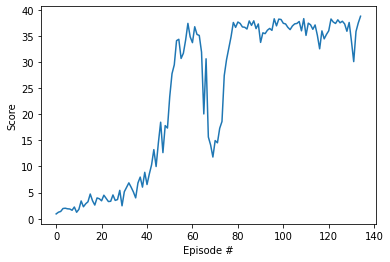

[0.894499980006367, 1.2224999726749957, 1.3684999694116413, 1.9314999568276108, 1.9884999555535614, 1.877999958023429, 1.8384999589063227, 1.5969999643042683, 2.222999950312078, 1.2114999729208649, 1.772999960370362, 3.3854999243281783, 2.26199994944036, 2.837999936565757, 3.228499927837402, 4.713999894633889, 3.43049992332235, 2.5964999419637023, 3.961999911442399, 3.81199991479516, 3.4139999236911533, 4.491499899607152, 3.881499913241714, 3.2674999269656837, 3.3219999257475137, 4.536999898590148, 3.488499922025949, 3.6459999185055496, 5.4199998788535595, 2.451999945193529, 5.149499884899706, 5.996999865956605, 6.854499846789986, 6.025999865308404, 5.112999885715544, 3.977499911095947, 6.8319998472929, 7.964999821968377, 6.040499864984303, 8.88199980147183, 6.53649985389784, 8.540999809093773, 10.308499769587069, 13.236999704129994, 9.995499776583165, 14.555499674659222, 18.502999586425723, 12.66249971697107, 17.84999960102141, 17.380999611504375, 23.40799947679043, 27.813999378308655

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
#
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(scores)


In [162]:
torch.save(agent.actor_net.state_dict(), "actor_net.pth")
torch.save(agent.critic_net.state_dict(), "critic_net.pth")
